# Don't Overfit! II EDA + ML

![](https://www.apixio.com/wp-content/uploads/2017/10/classification-with-overfitting-2.png)
[image-source](https://www.apixio.com/wp-content/uploads/2017/10/classification-with-overfitting-2.png)

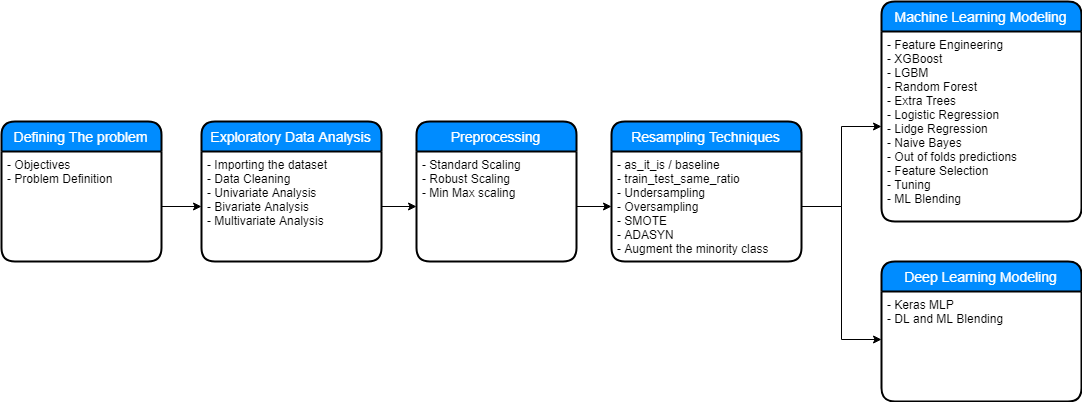

## Table of Contents
- Problem Definition and Objectives
- [Exploratory Data Analysis](#eda)
- Machine Learning Modeling
    - Potential Resampling Techniques
    - Feature Engineering
    - ML Modeling
    - Feature Selection
    - Tuning
    - DL Modeling
    - Ensemble / Blend Models
- Conclusion

### Experiment, Train of thought:

#### EDA -> Resampling (as it is) -> ML Modeling / DL Modeling

## Exploratory Data Analysis
<a id="eda"></a>

In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [94]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [95]:
train.shape, test.shape

((250, 302), (19750, 301))

In [96]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [97]:
train.target.value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

In [98]:
train.target.value_counts() / len(train)

1.0    0.64
0.0    0.36
Name: target, dtype: float64

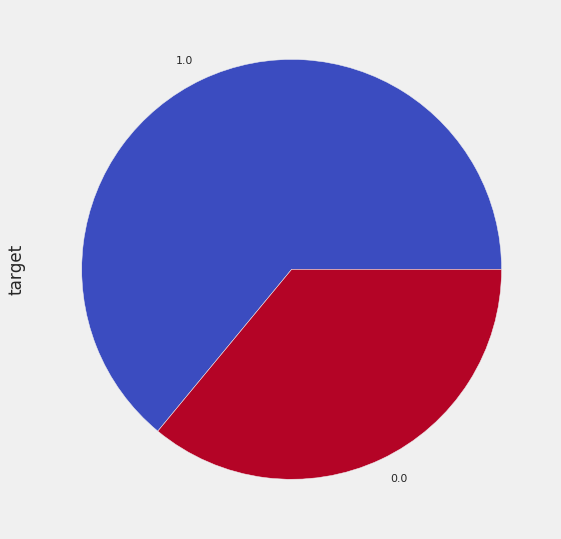

In [99]:
train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

In [100]:
train.isna().sum().sum()

0

In [101]:
test.isna().sum().sum()

0

In [102]:
train.describe()

id      target     ...             298         299
count  250.000000  250.000000     ...      250.000000  250.000000
mean   124.500000    0.640000     ...        0.009372   -0.128952
std     72.312977    0.480963     ...        1.008099    0.971219
min      0.000000    0.000000     ...       -3.211000   -3.500000
25%     62.250000    0.000000     ...       -0.550000   -0.754250
50%    124.500000    1.000000     ...       -0.009000   -0.132500
75%    186.750000    1.000000     ...        0.654250    0.503250
max    249.000000    1.000000     ...        3.530000    2.771000

[8 rows x 302 columns]

In [103]:
numerical_features = train.columns[2:]

Distributions columns


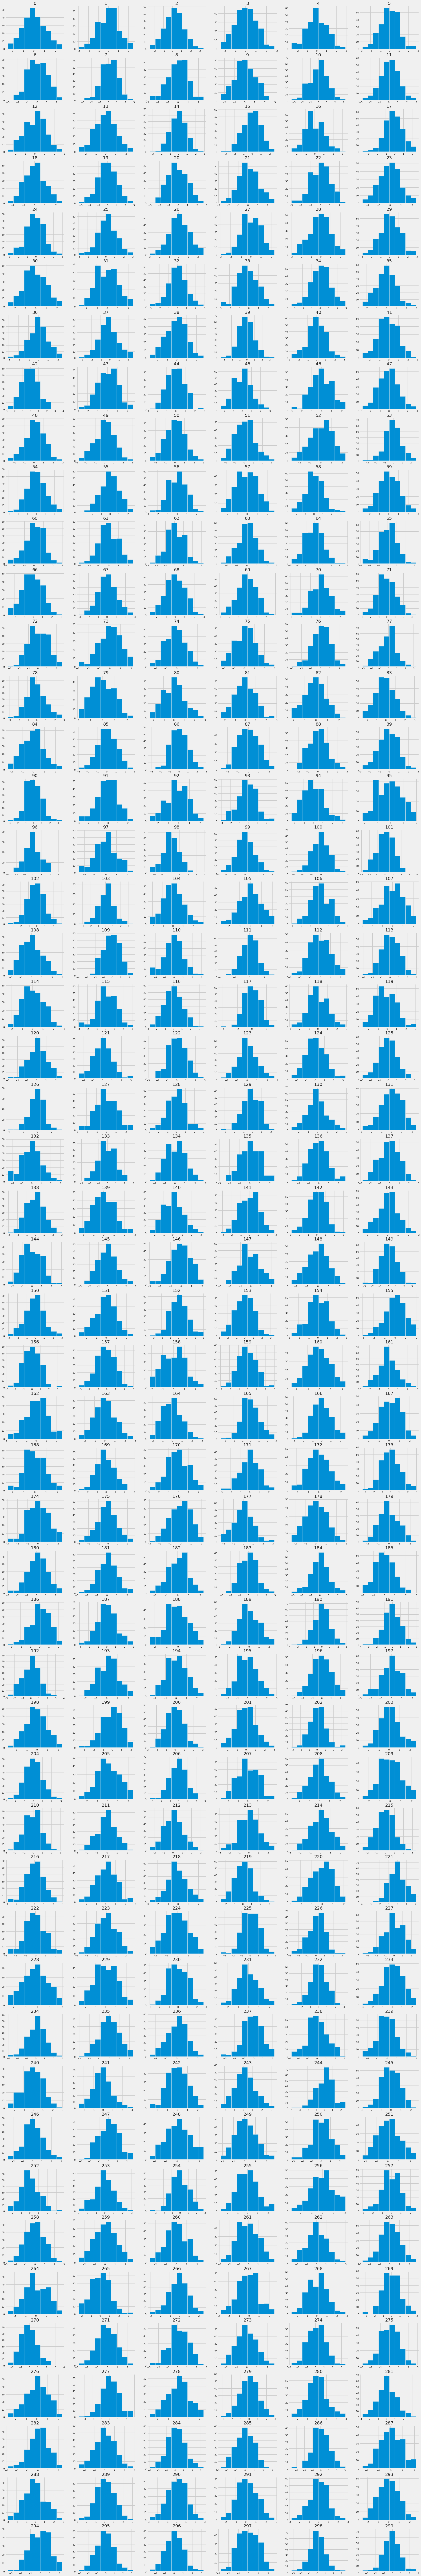

In [104]:
print('Distributions columns')
plt.figure(figsize=(30, 200))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 6, i + 1)
    plt.hist(train[col]) 
    plt.title(col)
gc.collect();

Distributions columns


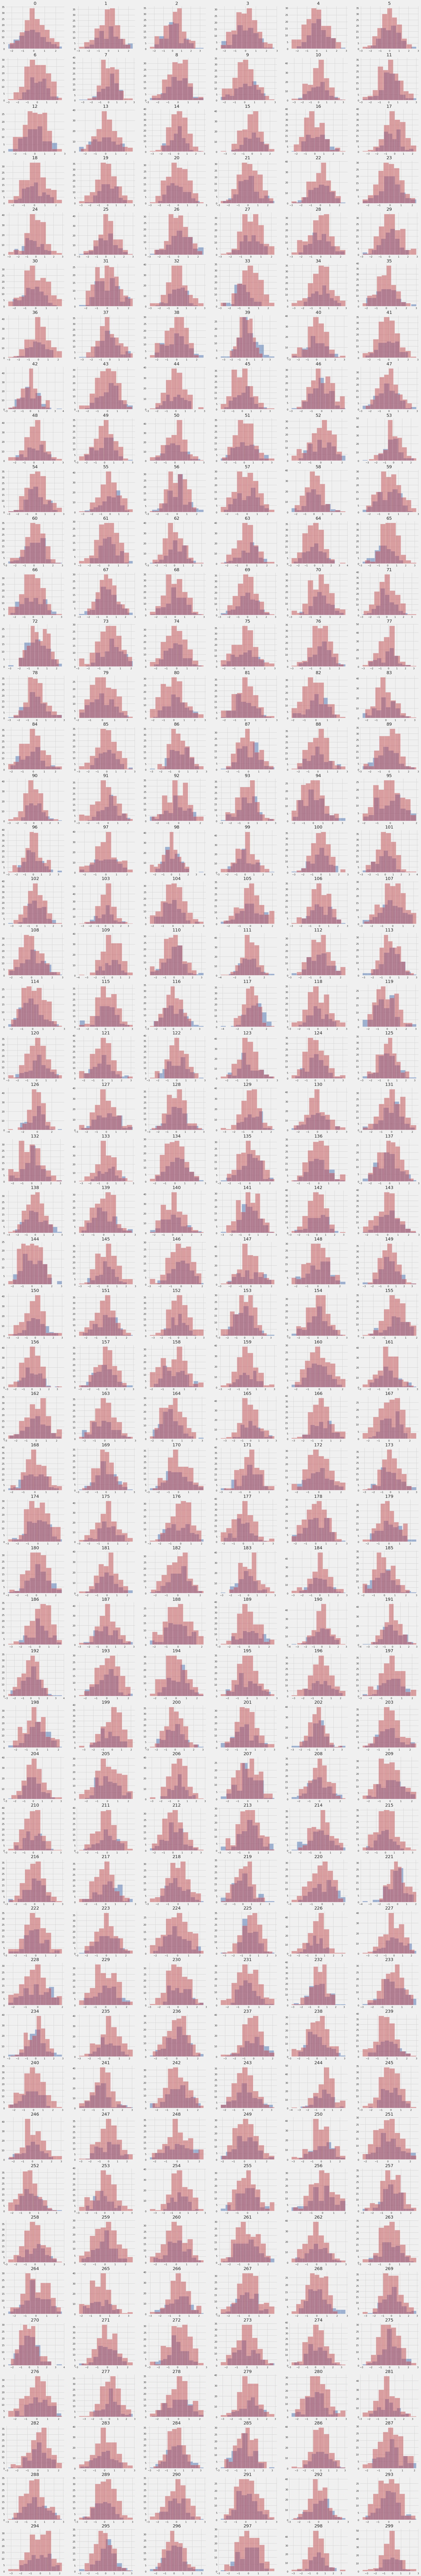

In [105]:
print('Distributions columns')
plt.figure(figsize=(30, 200))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 6, i + 1)
    plt.hist(train[train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(train[train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();

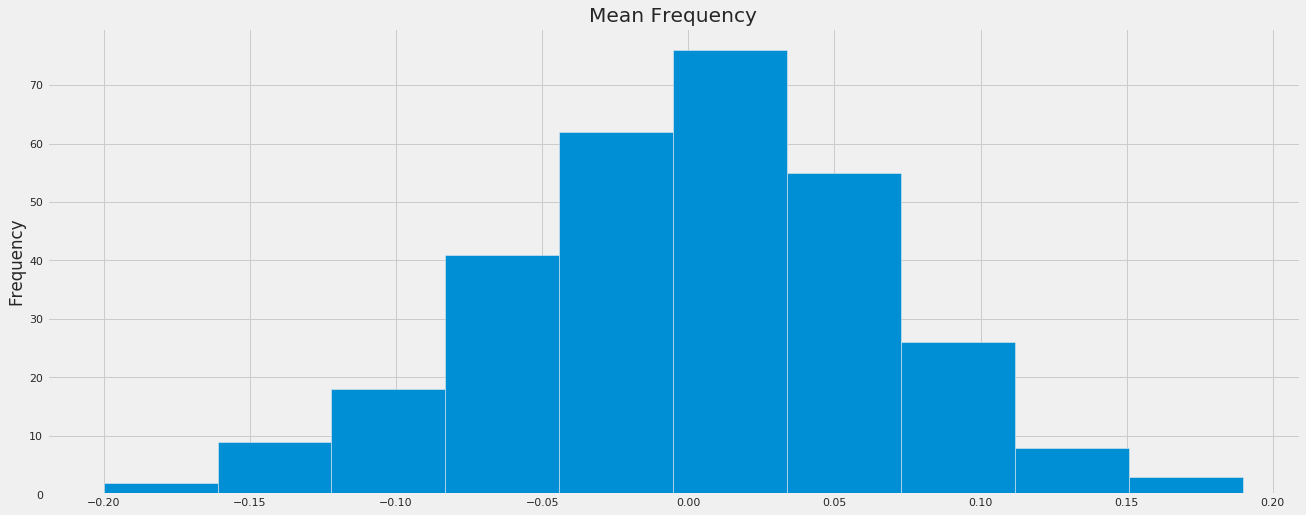

In [106]:
plt.figure(figsize=(20, 8))
train[numerical_features].mean().plot('hist');
plt.title('Mean Frequency');

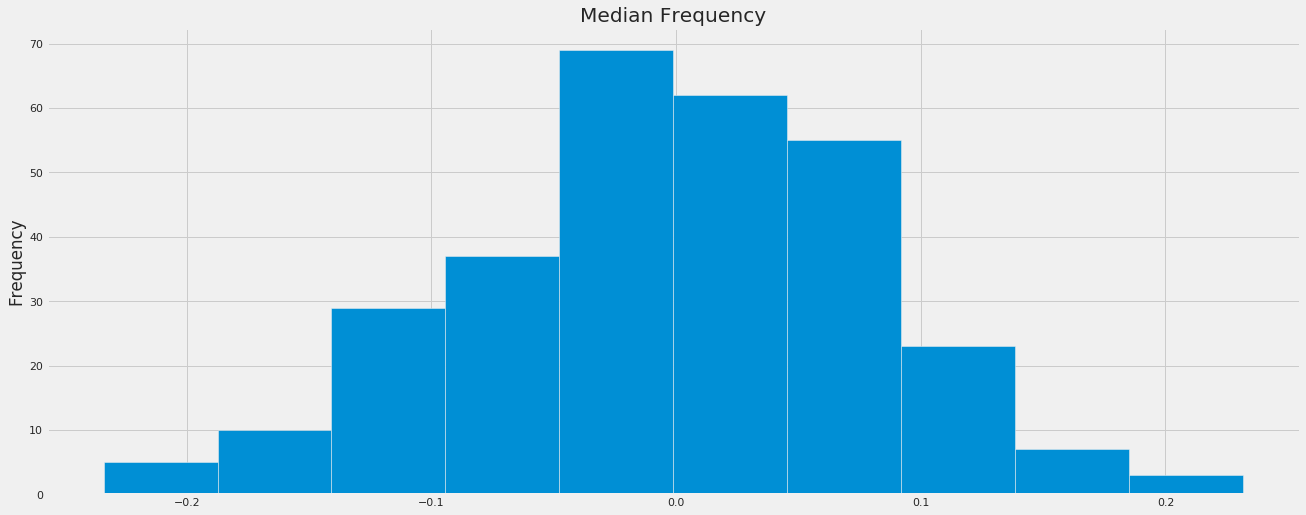

In [107]:
plt.figure(figsize=(20, 8))
train[numerical_features].median().plot('hist');
plt.title('Median Frequency');

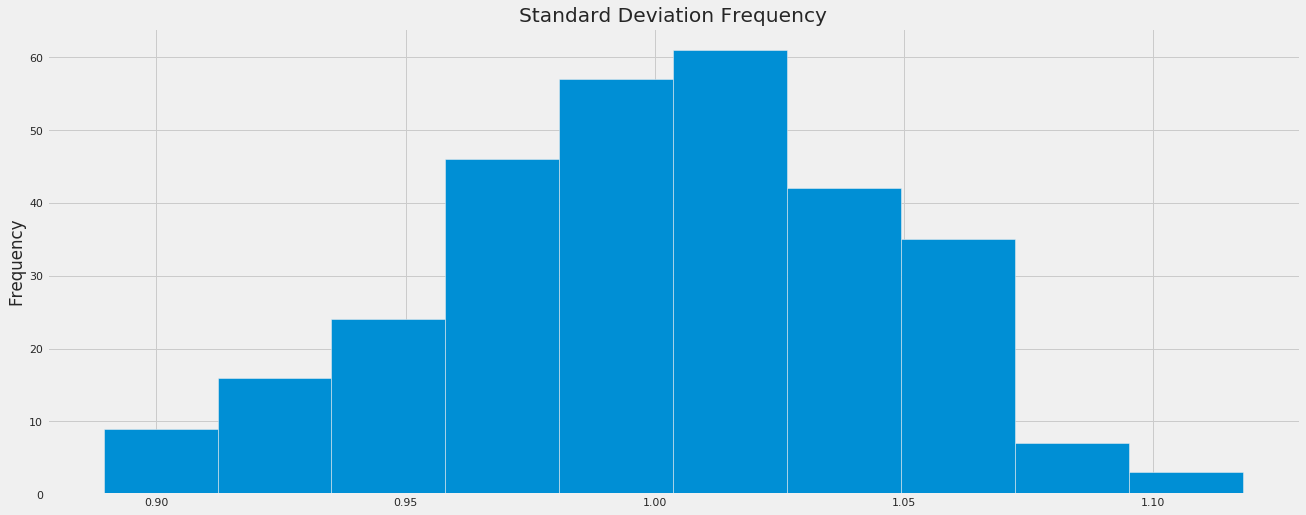

In [108]:
plt.figure(figsize=(20, 8))
train[numerical_features].std().plot('hist');
plt.title('Standard Deviation Frequency');

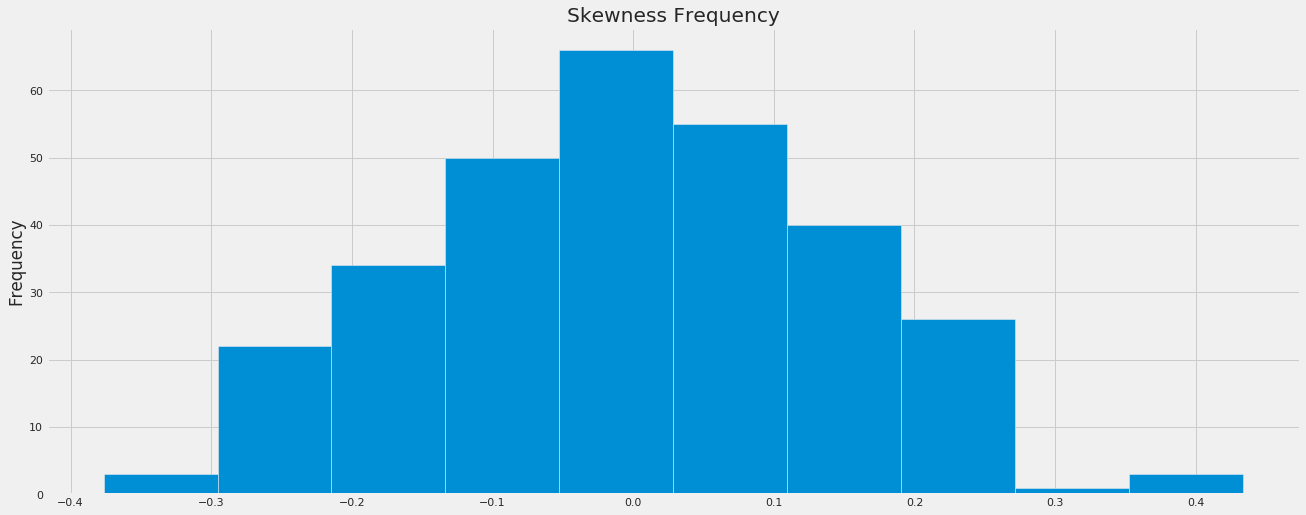

In [109]:
plt.figure(figsize=(20, 8))
train[numerical_features].skew().plot('hist');
plt.title('Skewness Frequency');

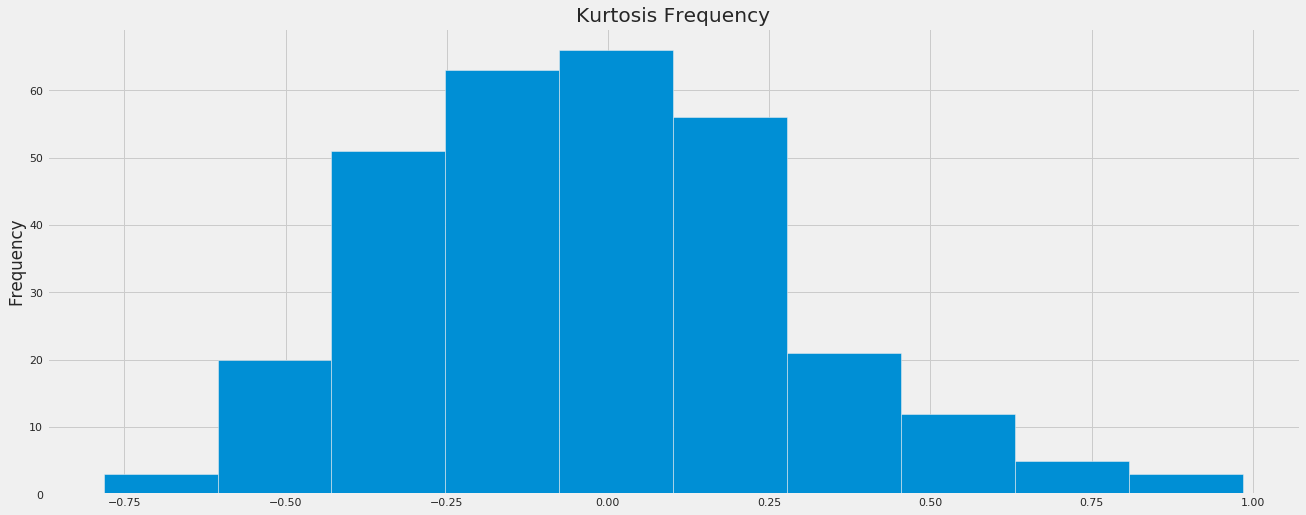

In [110]:
plt.figure(figsize=(20, 8))
train[numerical_features].kurt().plot('hist');
plt.title('Kurtosis Frequency');

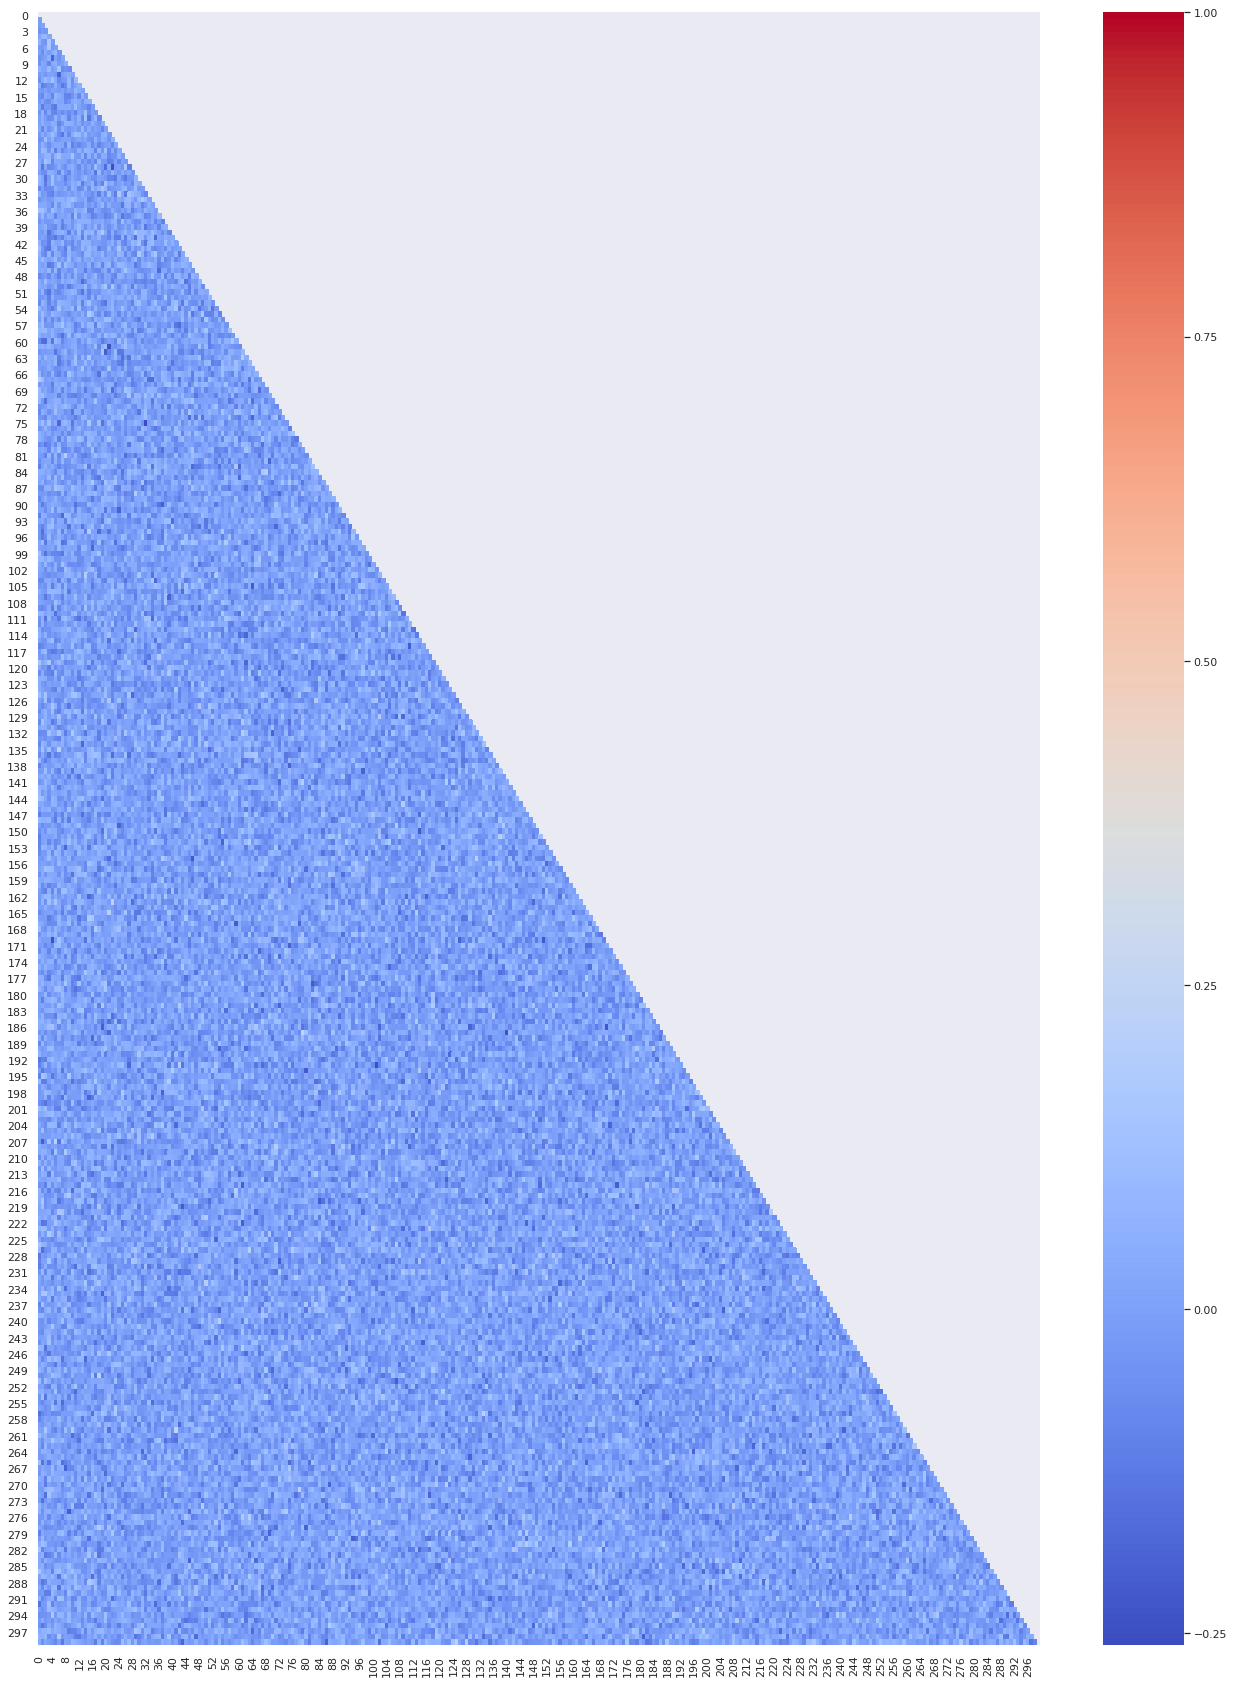

In [111]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = train[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

In [112]:
s = corr.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort")
so = so.drop_duplicates()

print("Top most highly positive correlated features:")
print(so[(so<1) & (so>0.2)].sort_values(ascending=False))

print()

print("Top most highly megative correlated features:")
print(so[(so < - 0.2)])

Top most highly positive correlated features:
79   187    0.243916
41   260    0.242902
22   163    0.236516
18   250    0.233152
5    207    0.226966
125  299    0.224052
78   271    0.222923
133  257    0.221418
6    135    0.216808
131  155    0.216209
21   165    0.213463
231  274    0.213213
243  276    0.212386
138  151    0.211722
54   240    0.210084
100  271    0.209413
63   227    0.207998
61   63     0.207553
87   296    0.207524
61   132    0.207165
137  200    0.206929
107  214    0.206226
8    81     0.205368
122  270    0.205286
50   233    0.205262
63   276    0.203690
0    67     0.202806
141  271    0.202313
71   208    0.202069
102  129    0.201321
61   245    0.201165
128  299    0.200844
156  237    0.200710
42   193    0.200387
dtype: float64

Top most highly megative correlated features:
32   75    -0.259315
101  193   -0.252825
22   28    -0.246062
140  187   -0.244012
4    170   -0.242965
21   61    -0.241085
151  170   -0.227826
170  186   -0.226870
46   155  

## Machine Learning Modeling

In [113]:
train.shape, test.shape

((250, 302), (19750, 301))

In [114]:
# special thanks to https://www.kaggle.com/gpreda/santander-eda-and-prediction
# also big help for feature engineering :https://www.kaggle.com/hjd810/keras-lgbm-aug-feature-eng-sampling-prediction
# last but not least: https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/87486#latest-506429

fs_params = dict()
fs_params["descriptives"] = True
fs_params["standardization"] = False
fs_params["percentiles"] = False
fs_params["squared"] = False
fs_params["frequency"] = False

gc.collect();
turn = 0
from sklearn.preprocessing import StandardScaler
for df in [test, train]:
    
    
    if turn == 0:
        print("Train set")
        turn = 1
    else:
        print("Test set")
    
    if (fs_params["descriptives"] == True):
        print('\t*descriptive statistics Feature Engineering:')
        df['sum'] = df[numerical_features].sum(axis=1)  
        df['min'] = df[numerical_features].min(axis=1)
        df['max'] = df[numerical_features].max(axis=1)
        df['mean'] = df[numerical_features].mean(axis=1)
        df['std'] = df[numerical_features].std(axis=1)
        df['skew'] = df[numerical_features].skew(axis=1)
        df['kurt'] = df[numerical_features].kurtosis(axis=1)
        df['med'] = df[numerical_features].median(axis=1)
        print('\t*descriptive statistics Feature Engineering done!')
    
    if (fs_params["standardization"] == True):
        print('\t*Standardizing the data:')
        #inf values can result from squaring
        scaler = StandardScaler()
        df[numerical_features] = scaler.fit_transform(df[numerical_features])
        print('\t*Data Standardized!')
    
    if (fs_params["percentiles"] == True):
        print('\t*percentiles Feature Engineering:')
        perc_list = [1,2,5,10,25,50,60,75,80,85,95,99]
        for i in perc_list:
            df['perc_'+str(i)] =  df[numerical_features].apply(lambda x: np.percentile(x, i), axis=1)
        print('\t*Done percentiles Feature Engineering!')
    
    if (fs_params["squared"] == True):
        print('\t*Loading Squared data:')
        for i in numerical_features:
            df['var_sq_'+str(i)] = np.square(df[str(i)])
        print('\t*Done squaring!')
    
    if (fs_params["frequency"] == True):
        #thanks to  https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/87486#latest-506429
        print('\t*Loading frequency:')
        for var in numerical_features:
            hist, bin_edges = np.histogram(df[var], bins=1000, density=True)
            df['hist_'+var] = [ hist[np.searchsorted(bin_edges,ele)-1] for ele in df[var]]
        print('\t*Done Loading frequency!')
    
gc.collect();

Train set
	*descriptive statistics Feature Engineering:
	*descriptive statistics Feature Engineering done!
Test set
	*descriptive statistics Feature Engineering:
	*descriptive statistics Feature Engineering done!


In [115]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '298', '299', 'sum', 'min', 'max', 'mean', 'std', 'skew', 'kurt',
       'med'],
      dtype='object', length=310)

In [116]:
train.head(6)

id  target      0      1   ...         std      skew      kurt     med
0   0     1.0 -0.098  2.165   ...    1.089171  0.037492 -0.421830 -0.0505
1   1     0.0  1.081 -0.973   ...    0.985838 -0.214699 -0.002719  0.0745
2   2     1.0 -0.523 -0.089   ...    1.012757  0.176601 -0.045113  0.0285
3   3     1.0  0.067 -0.021   ...    0.939743  0.167122  0.203417  0.1525
4   4     1.0  2.347 -0.831   ...    0.941277  0.309384  0.149147  0.1120
5   5     1.0 -0.641 -0.576   ...    1.104583 -0.136514  0.042361 -0.0340

[6 rows x 310 columns]

In [117]:
train.shape, test.shape

((250, 310), (19750, 309))

## Pre-processing

In [118]:
y = train['target']
X = train.drop(['target', "id"], axis=1)
xtest = test.drop("id", axis="columns")

std_scaler_flag = True
robust_scaler_flag = False
min_max_scalar_flag = False

if std_scaler_flag == True:

    print("StandardScaler!")
    from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

    sc0 = StandardScaler()
    sc0.fit(X)
    X = sc0.transform(X)
    X = pd.DataFrame(X, columns=train.drop(['target', "id"], axis=1).columns)
    xtest = sc0.transform(xtest)
    xtest = pd.DataFrame(xtest, columns = test.drop("id", axis="columns").columns)
    print(X.head(6))

else:
    print("No scaling at all!")

StandardScaler!
          0         1         2    ...         skew      kurt       med
0 -0.121736  2.176002  0.503692    ...     0.264814 -1.596212 -0.628504
1  1.061577 -0.939278 -0.539790    ...    -1.507822  0.114044  0.988817
2 -0.548290 -0.061678 -0.505465    ...     1.242607 -0.058950  0.393643
3  0.043868  0.005829  0.220265    ...     1.175975  0.955222  1.998025
4  2.332208 -0.798306  0.336970    ...     2.175933  0.733760  1.474013
5 -0.666722 -0.545152  2.280749    ...    -0.958263  0.298004 -0.415017

[6 rows x 308 columns]


In [119]:
clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score"])

### Baseline Modeling
<a id="base"></a>

In [120]:
def xgboost_all_purpose(X, y, type_of_training, name, num_of_folds=3, params=None, in_folds_sampling = False, max_early_stopping = 100):
    
    ####
    #
    # This is an all purpose xgboost function for all balanced, imbalanced and resampling cases
    # please excuse me for its length
    # The different types of training that the method supports are the following:
    #
    # baseline
    # train_test_equal
    # smote
    # oversampling
    # adasyn
    # 
    #
    ####
    
    
    from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
    from collections import Counter
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    import scikitplot as skplt
    import time
    import random
    
    import xgboost as xgb
    
    global clf_stats_df
    
    if params is None:
        params = dict()
        params["learning_rate"] = 0.1
        params["n_estimators"] = 500
        params["max_depth"] = 6
        params["min_child_weight"] = 1
        params["gamma"] = 0
        params["subsample"] = 1
        params["colsample_bytree"] = 1
        params["colsample_bylevel"] = 1
        params["colsample_bynode"] = 1
        params["reg_alpha"] = 0
        params["reg_lambda"] = 1
        #params["scale_pos_weight"] = np.round(y.value_counts()[0] / y.value_counts()[1],3)
        params["scale_pos_weight"] = 1
        params["max_delta_step"] = 0
        #params["max_delta_step"] = 1
    
    print("params", params)
    print("max_early_stopping:", max_early_stopping)
    
    if type_of_training == "baseline":
        
        print("baseline")
        
        # create a 70/30 stratified split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.3)
    
        import xgboost as xgb

        start_time = time.time()
        
        predictions_probas_list = np.zeros([len(yvalid), 2])
        predictions_test = np.zeros(len(test))
        num_fold = 0
        #feature_importance_df = pd.DataFrame()
        
        folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False, random_state = 42)
        
        for train_index, valid_index in folds.split(xtrain, ytrain):
            xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
            ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]
            
            print()
            print("Stratified Fold:", num_fold)
            num_fold = num_fold + 1
            print()
            
            clf_stra_xgb = xgb.XGBClassifier(learning_rate=params["learning_rate"], 
                                    n_estimators=params["n_estimators"], 
                                    max_depth=params["max_depth"],
                                    min_child_weight=params["min_child_weight"],
                                    gamma=params["gamma"],
                                    subsample=params["subsample"],
                                    colsample_bytree=params["colsample_bytree"],
                                    colsample_bylevel=params["colsample_bylevel"],
                                    colsample_bynode = params["colsample_bynode"],
                                    objective= 'binary:logistic',
                                    nthread=-1,
                                    scale_pos_weight=params["scale_pos_weight"],
                                    reg_alpha = params["reg_alpha"],
                                    reg_lambda = params["reg_lambda"],
                                    max_delta_step = params["max_delta_step"],
                                    seed=42)

            clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                        early_stopping_rounds=max_early_stopping, eval_metric='auc', verbose=100)
            
            #fold_importance_df = pd.DataFrame()
            #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
            #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
            #fold_importance_df["fold"] = n_fold + 1
            #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

            predictions = clf_stra_xgb.predict(xvalid)
            predictions_probas = clf_stra_xgb.predict_proba(xvalid)
            predictions_probas_list += predictions_probas/num_of_folds
            
            predictions_test += clf_stra_xgb.predict_proba(test[xtrain.columns])[:,1]/num_of_folds
            
        
        predictions = np.argmax(predictions_probas, axis=1)

        print()
        print(classification_report(yvalid, predictions))

        print()
        print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))
        
        print()
        print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))
        
        print()
        print("elapsed time in seconds: ", time.time() - start_time)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_roc(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_lift_curve(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(12, 38)})
        xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

        clf_stats_df = clf_stats_df.append({"clf_name": name,
                             "F1-score":f1_score(yvalid, predictions, average = "macro"),
                             "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)
        
        print()
        gc.collect();
        return clf_stra_xgb, predictions_test
    
    elif type_of_training == "train_test_equal":
        
        print("train_test_equal_flag")
        
        # create a 70/30 stratified split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.3)
    
        import xgboost as xgb

        start_time = time.time()
        
        predictions_probas_list = np.zeros([len(yvalid), 2])
        predictions_test = np.zeros(len(test))
        num_fold = 0
        #feature_importance_df = pd.DataFrame()
        
        print("resample xtrain set to be equal to the size of the test set")
        temp_df = pd.DataFrame(xtrain, columns=xtrain.columns)
        temp_df["target"] = ytrain
        temp_df = temp_df.sample(frac = len(test) / len(xtrain), replace = True)
        ytrain = temp_df['target']
        xtrain = temp_df.drop(['target'], axis=1)
        del temp_df;
        print(xtrain.shape, test.shape)
        
        folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False, random_state = 42)
        
        for train_index, valid_index in folds.split(xtrain, ytrain):
            xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
            ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]
            
            print()
            print("Stratified Fold:", num_fold)
            num_fold = num_fold + 1
            print()
            
            clf_stra_xgb = xgb.XGBClassifier(learning_rate=params["learning_rate"], 
                                    n_estimators=params["n_estimators"], 
                                    max_depth=params["max_depth"],
                                    min_child_weight=params["min_child_weight"],
                                    gamma=params["gamma"],
                                    subsample=params["subsample"],
                                    colsample_bytree=params["colsample_bytree"],
                                    colsample_bylevel=params["colsample_bylevel"],
                                    colsample_bynode = params["colsample_bynode"],
                                    objective= 'binary:logistic',
                                    nthread=-1,
                                    scale_pos_weight=params["scale_pos_weight"],
                                    reg_alpha = params["reg_alpha"],
                                    reg_lambda = params["reg_lambda"],
                                    max_delta_step = params["max_delta_step"],
                                    seed=42)

            clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                        early_stopping_rounds=max_early_stopping, eval_metric='auc', verbose=100)
            
            #fold_importance_df = pd.DataFrame()
            #fold_importance_df["feature"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].index
            #fold_importance_df["fscore"] = pd.DataFrame.from_dict(data=clf_stra_xgb.get_fscore(), orient="index", columns=["FScore"])["FScore"].values
            #fold_importance_df["fold"] = n_fold + 1
            #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

            predictions = clf_stra_xgb.predict(xvalid)
            predictions_probas = clf_stra_xgb.predict_proba(xvalid)
            predictions_probas_list += predictions_probas/num_of_folds
            
            predictions_test += clf_stra_xgb.predict_proba(test[xtrain.columns])[:,1]/num_of_folds
            
        
        predictions = np.argmax(predictions_probas, axis=1)

        print()
        print(classification_report(yvalid, predictions))

        print()
        print("CV f1_score", f1_score(yvalid, predictions, average = "macro"))
        
        print()
        print("CV roc_auc_score", roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro"))
        
        print()
        print("elapsed time in seconds: ", time.time() - start_time)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_roc(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

        sns.set(rc={'figure.figsize':(8,8)})
        skplt.metrics.plot_lift_curve(yvalid, predictions_probas)
        
        sns.set(rc={'figure.figsize':(12, 38)})
        xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

        clf_stats_df = clf_stats_df.append({"clf_name": name,
                             "F1-score":f1_score(yvalid, predictions, average = "macro"),
                             "auc-score": roc_auc_score(yvalid, predictions_probas_list[:,1], average = "macro")}, ignore_index=True)
        
        print()
        gc.collect();
        return clf_stra_xgb, predictions_test

    
    
    else:
        print("Please specify for the argument 'type_of_training'one of the following parameters: (baseline, oversampling, smote, undersampling, augmentation_by_fraction)")

params {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'max_delta_step': 0}
max_early_stopping: 200
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.969605	validation_1-auc:0.683036
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.638393
[200]	validation_0-auc:1	validation_1-auc:0.649554
Stopping. Best iteration:
[2]	validation_0-auc:0.993161	validation_1-auc:0.729911


Stratified Fold: 1

[0]	validation_0-auc:0.983156	validation_1-auc:0.427455
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.573

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


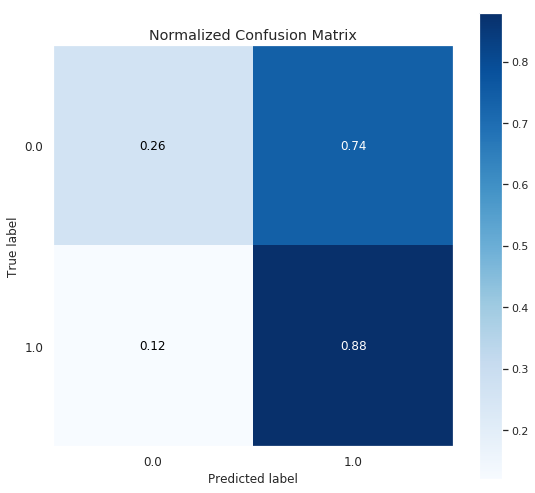

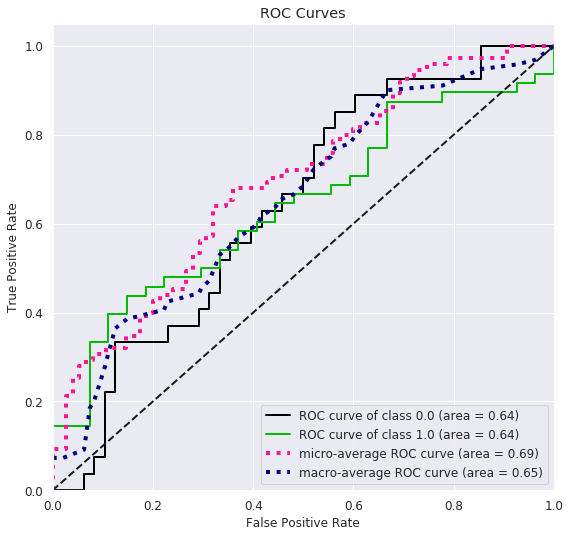

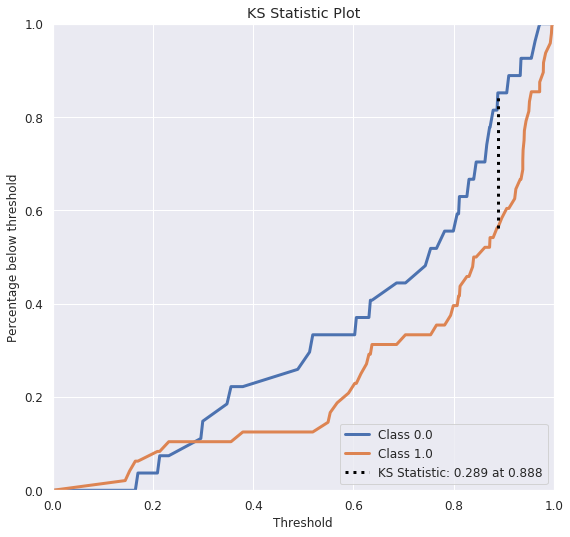

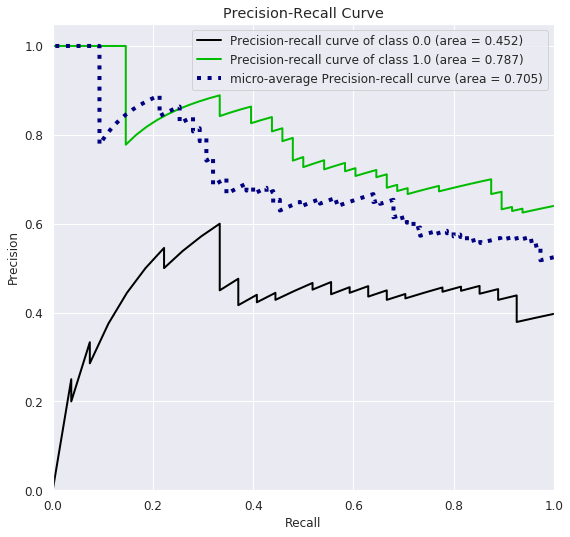

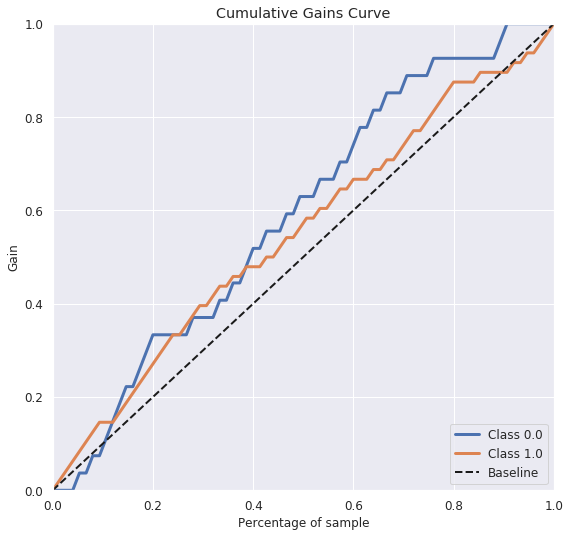

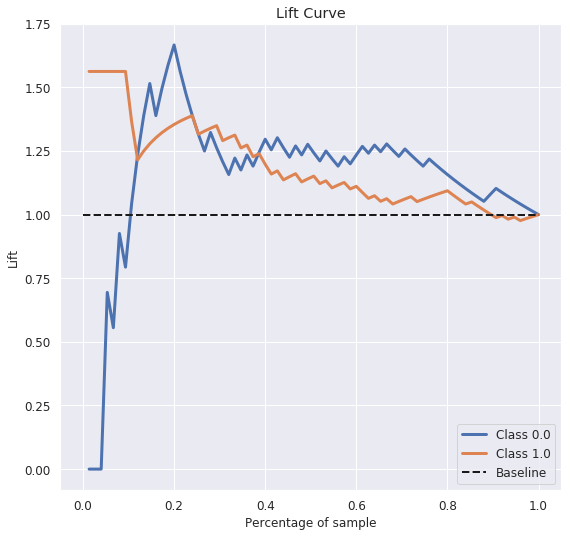

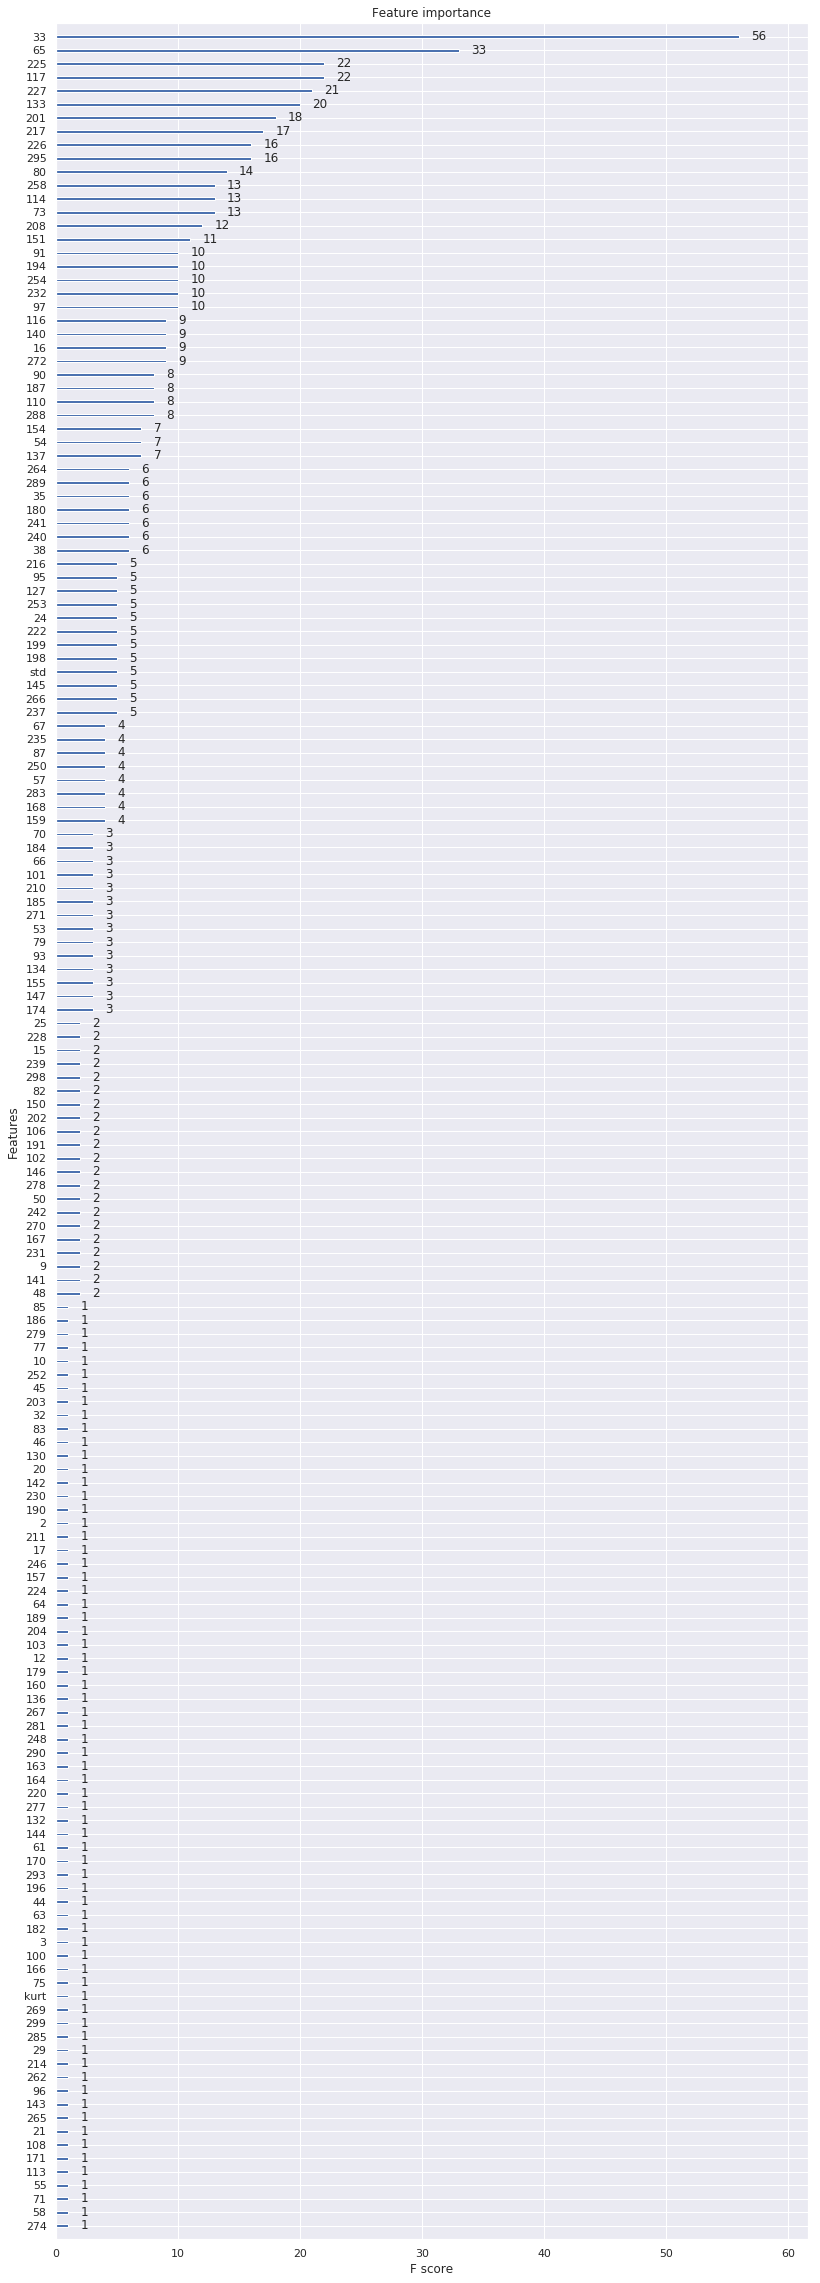

In [121]:
type_of_training = "baseline"
    
num_of_folds = 4 ### must be more than 2
in_folds_sampling = False

clf_xgb, predictions_test_xgb = xgboost_all_purpose(X,y, num_of_folds = num_of_folds, 
                                                    type_of_training =type_of_training, 
                                                    in_folds_sampling = in_folds_sampling, 
                                                    max_early_stopping = 200, 
                                                    name="clf_xgb")

del clf_xgb

### Feature Selection
<a id="fs"></a>

In [122]:
gc.collect()
import eli5
feature_selection_flag = True

if feature_selection_flag == True:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    import xgboost as xgb

    gc.collect();
    xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


    #rfc_model = RandomForestClassifier(random_state=42, 
    #                                   class_weight={0: 1, 1: np.round(y.value_counts()[0] / y.value_counts()[1],3)}
    #                                  )
    
    fs_model = xgb.XGBClassifier(nthread = -1, 
                                  objective = 'binary:logistic', 
                                  eval_metric = 'auc', 
                                  silent=1, 
                                  tree_method='auto',
                                  max_depth = 3,  
                                  scale_pos_weight = np.round(y.value_counts()[0] / y.value_counts()[1],3))
    
    fs_model.fit(xtrain, ytrain)

    import eli5
    from eli5.sklearn import PermutationImportance

    perm = PermutationImportance(fs_model, random_state=42).fit(xvalid, yvalid)

In [123]:
eli5.show_weights(perm, feature_names = xvalid.columns.tolist(), top=100)

### Select top 50, 25 and 15 features based on their permutation importance

In [124]:
if feature_selection_flag == True:
    from sklearn.feature_selection import SelectFromModel
   
    max_selected_features = 50
    sel = SelectFromModel(perm, max_features = max_selected_features, prefit=True)

    feature_idx = sel.get_support()
    selected_feature_names = X.columns[feature_idx]

    
    X_fs_50 = X[selected_feature_names]
    print(X_fs_50.shape)
    
    max_selected_features = 25
    sel = SelectFromModel(perm, max_features = max_selected_features, prefit=True)

    feature_idx = sel.get_support()
    selected_feature_names = X.columns[feature_idx]

    
    X_fs_25 = X[selected_feature_names]
    print(X_fs_25.shape)
    
    max_selected_features = 15
    sel = SelectFromModel(perm, max_features = max_selected_features, prefit=True)

    feature_idx = sel.get_support()
    selected_feature_names = X.columns[feature_idx]

    
    X_fs_15 = X[selected_feature_names]
    print(X_fs_15.shape)

(250, 46)
(250, 25)
(250, 15)


### Untuned XGBoost with top 50 features

params {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'max_delta_step': 0}
max_early_stopping: 100
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.974924	validation_1-auc:0.72433
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.870536
Stopping. Best iteration:
[96]	validation_0-auc:1	validation_1-auc:0.870536


Stratified Fold: 1

[0]	validation_0-auc:0.969098	validation_1-auc:0.612723
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.691964
Stopping. Best iteration:
[56]	validation_0-auc:1	vali

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


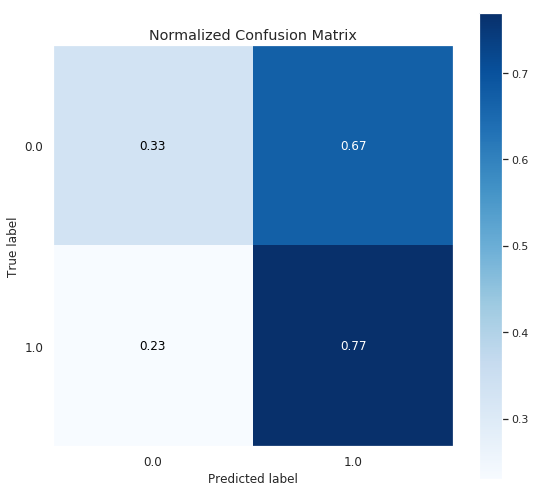

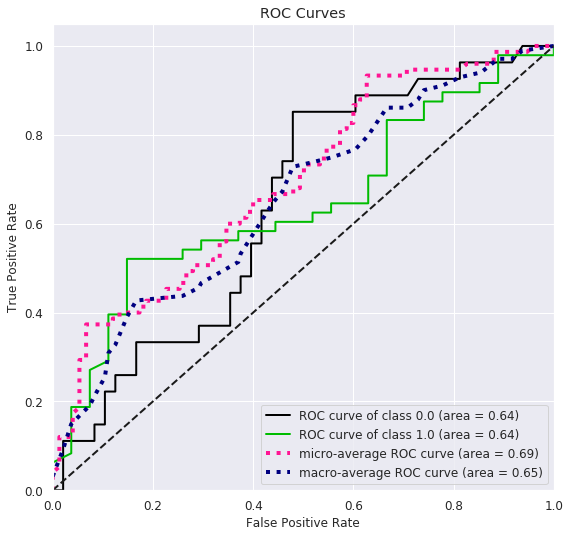

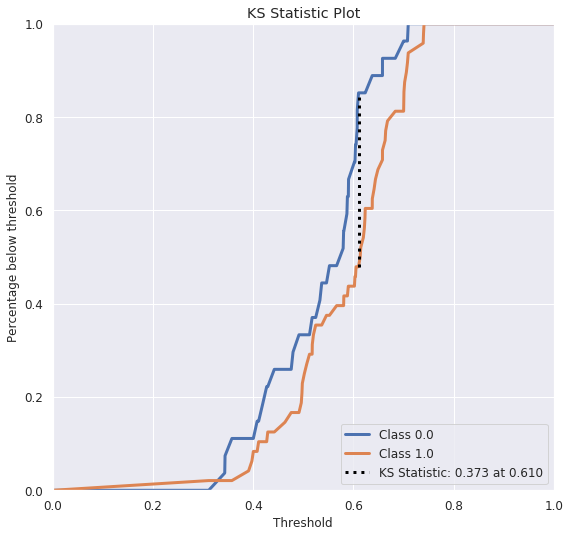

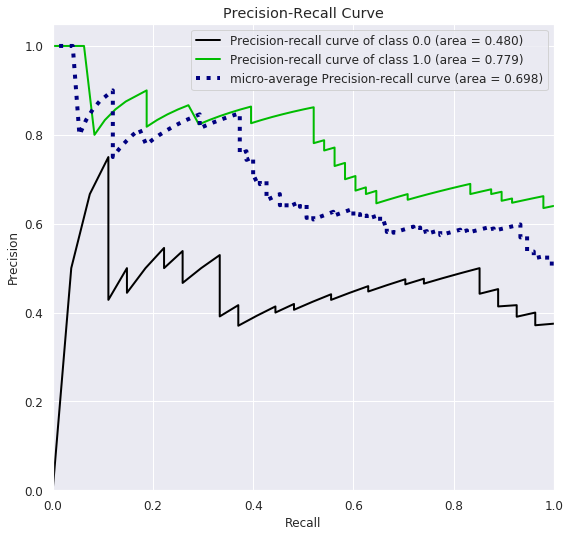

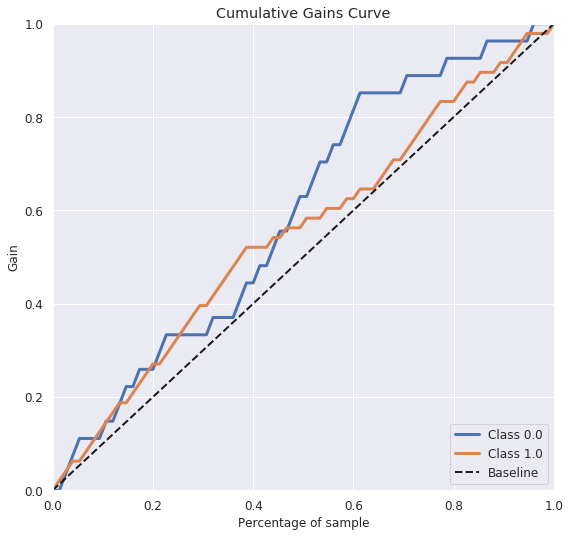

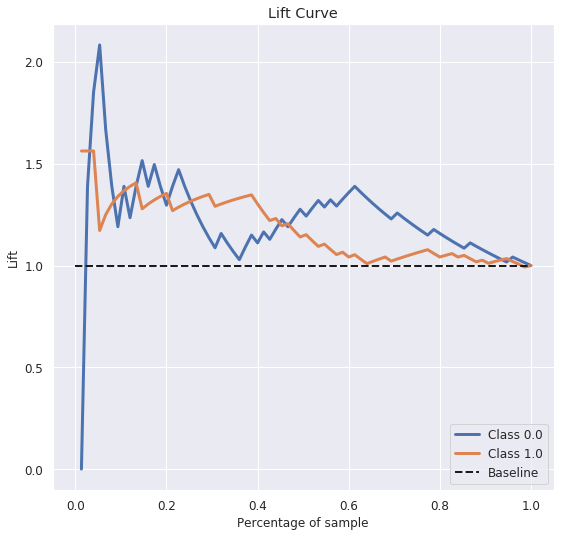

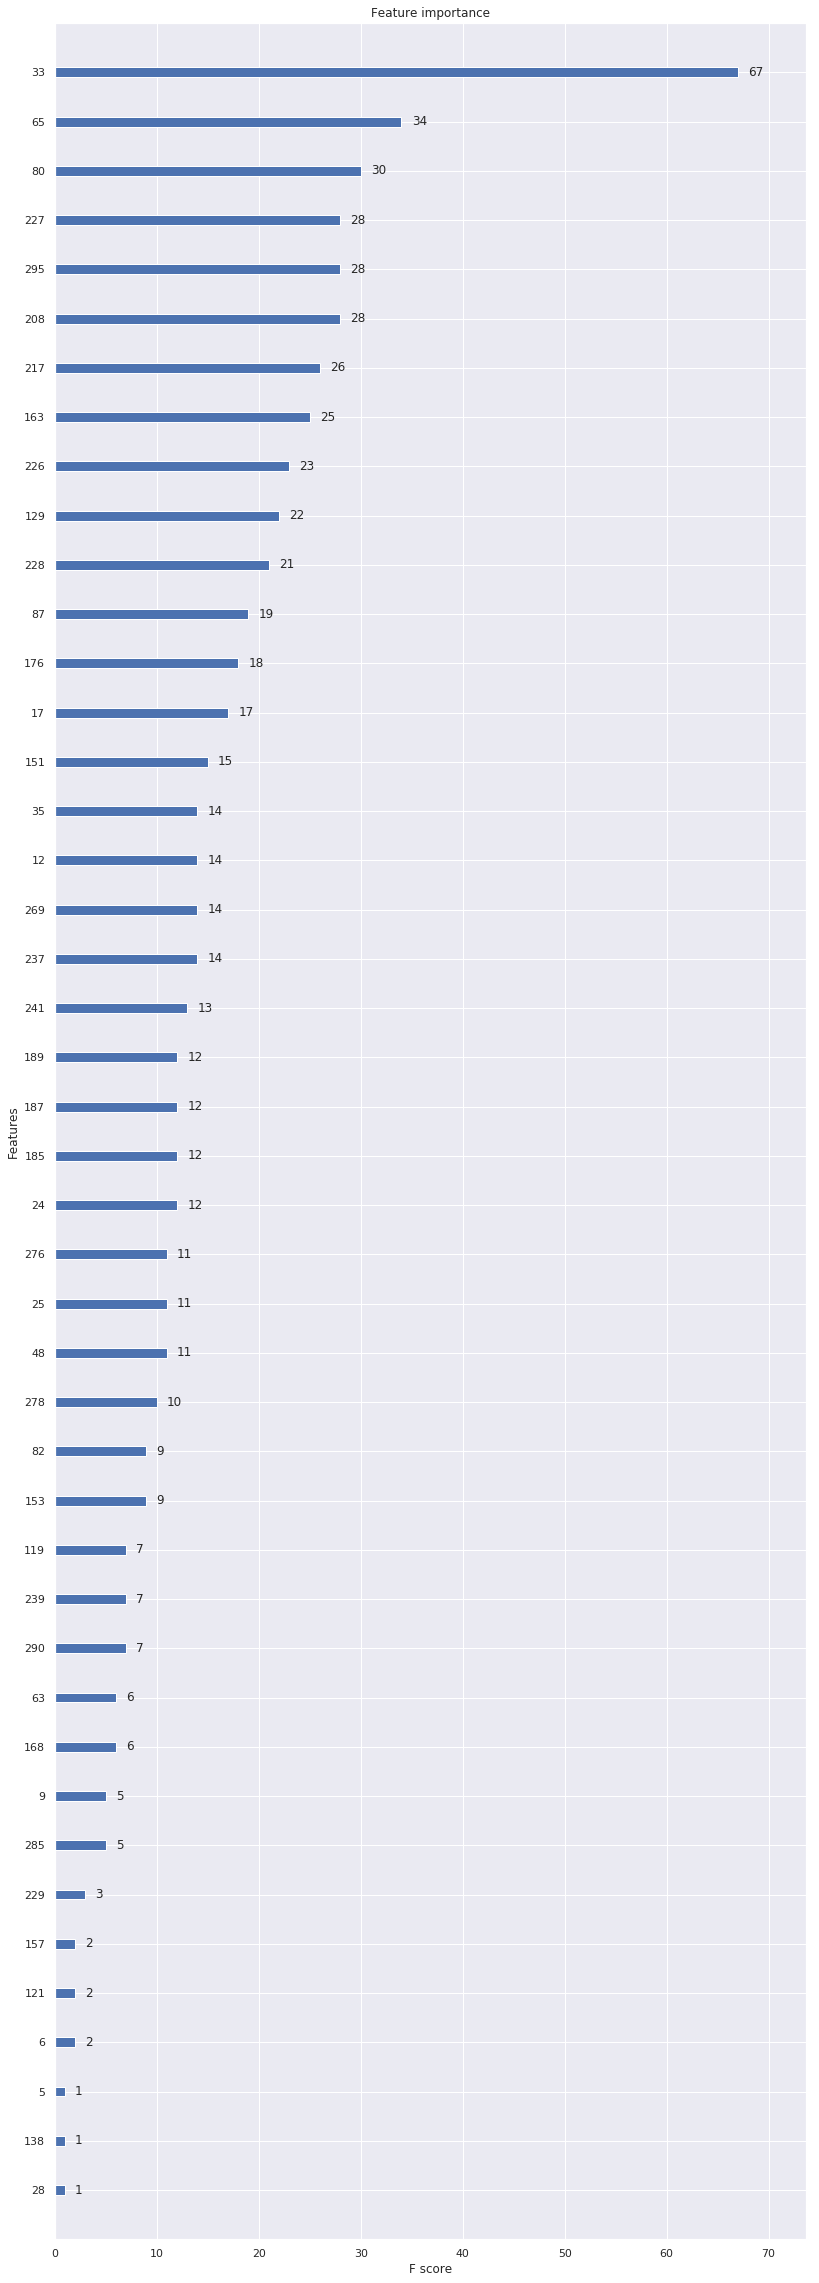

In [125]:
   fs_clf_xgb, predictions_test_fs_50_xgb = xgboost_all_purpose(X_fs_50,
                                                              y,
                                                              type_of_training =type_of_training, 
                                                              num_of_folds = num_of_folds, 
                                                              max_early_stopping= 100, 
                                                              name="fs_clf_50_xgb")

In [126]:
clf_stats_df

clf_name  F1-score  auc-score
0        clf_xgb  0.556818   0.689815
1  fs_clf_50_xgb  0.550713   0.721451

### Untuned XGBoost with top 25 features

params {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'max_delta_step': 0}
max_early_stopping: 100
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.950228	validation_1-auc:0.714286
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.872768
[200]	validation_0-auc:1	validation_1-auc:0.863839
Stopping. Best iteration:
[113]	validation_0-auc:1	validation_1-auc:0.886161


Stratified Fold: 1

[0]	validation_0-auc:0.969098	validation_1-auc:0.612723
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.665179
S

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


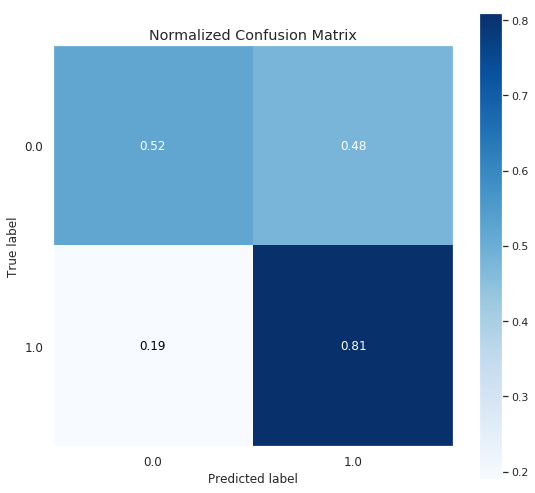

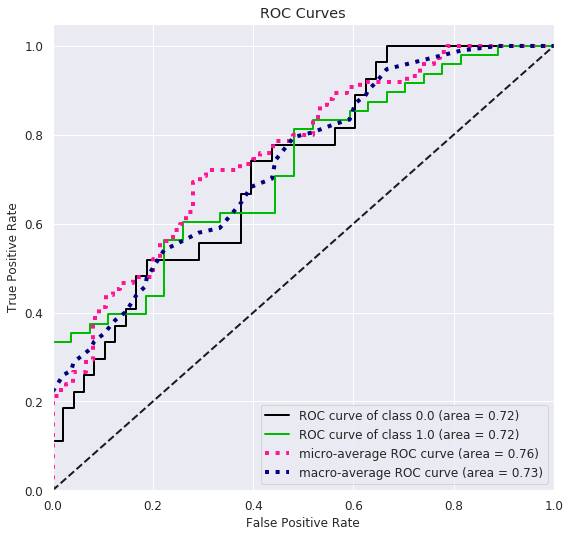

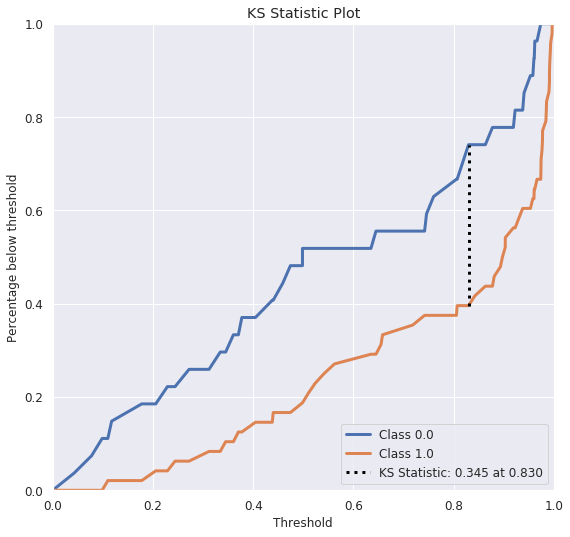

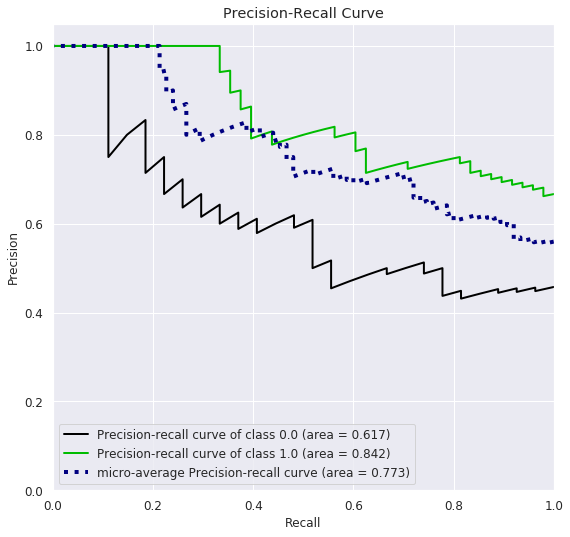

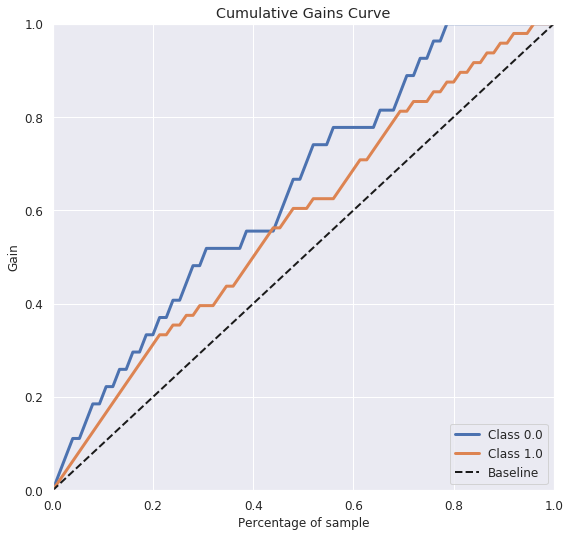

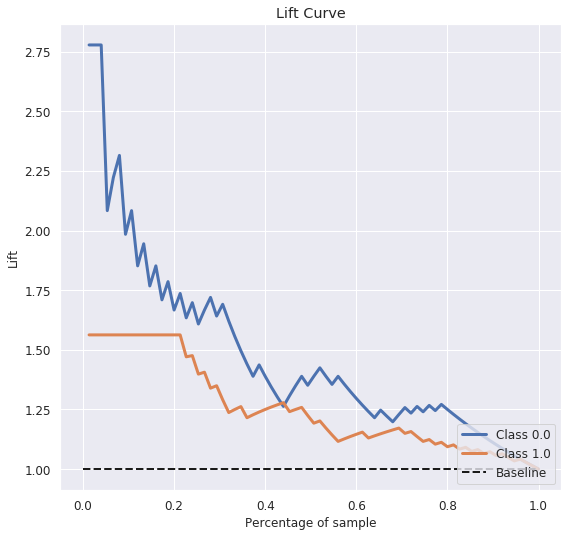

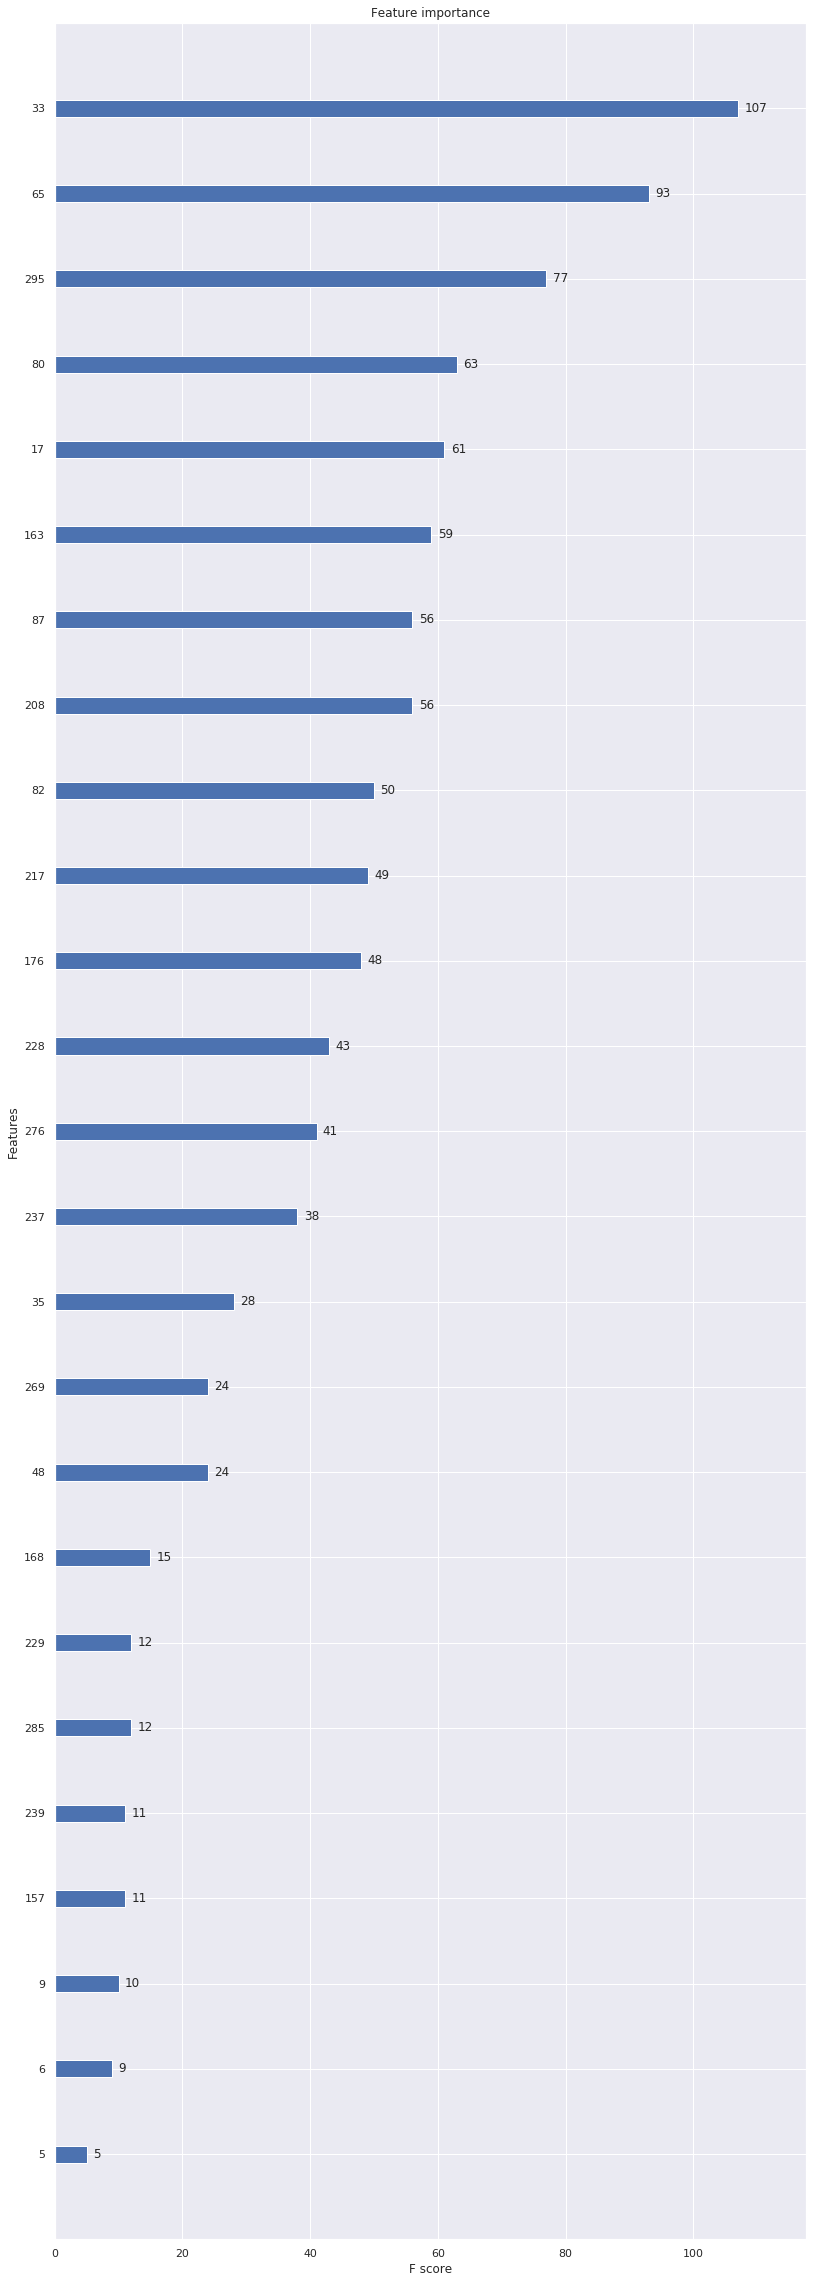

In [127]:
    fs_clf_xgb, predictions_test_fs_25_xgb = xgboost_all_purpose(X_fs_25,
                                                              y,
                                                              type_of_training =type_of_training, 
                                                              num_of_folds = num_of_folds, 
                                                              max_early_stopping= 100, 
                                                              name="fs_clf_25_xgb")

In [128]:
clf_stats_df

clf_name  F1-score  auc-score
0        clf_xgb  0.556818   0.689815
1  fs_clf_50_xgb  0.550713   0.721451
2  fs_clf_25_xgb  0.670000   0.756944

### Untuned XGBoost with top 15 features

params {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'max_delta_step': 0}
max_early_stopping: 100
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.961373	validation_1-auc:0.710938
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.834821
Stopping. Best iteration:
[34]	validation_0-auc:1	validation_1-auc:0.854911


Stratified Fold: 1

[0]	validation_0-auc:0.974544	validation_1-auc:0.683036
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:1	validation_1-auc:0.698661
Stopping. Best iteration:
[43]	validation_0-auc:1	val

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


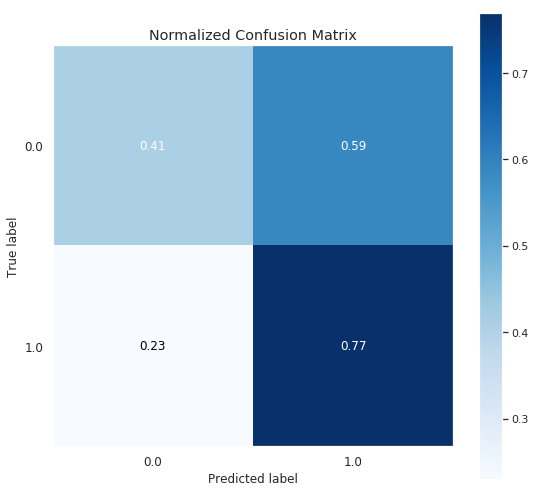

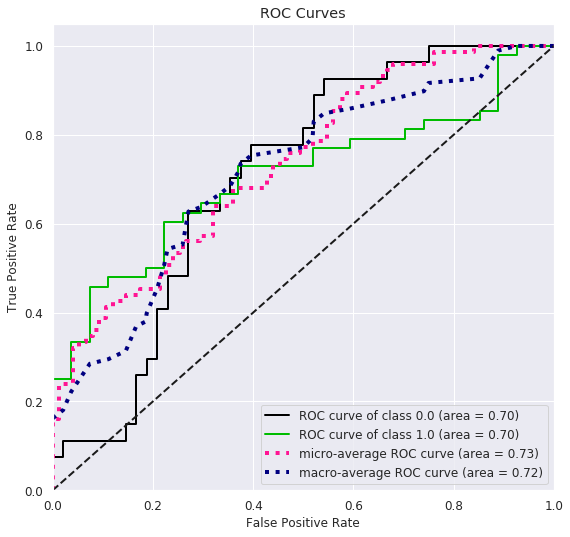

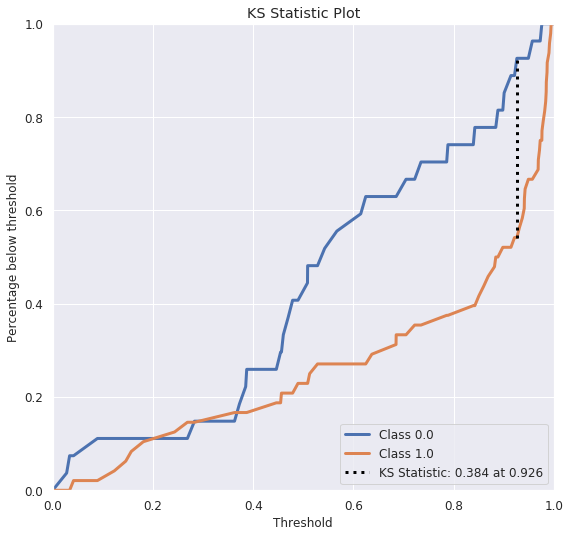

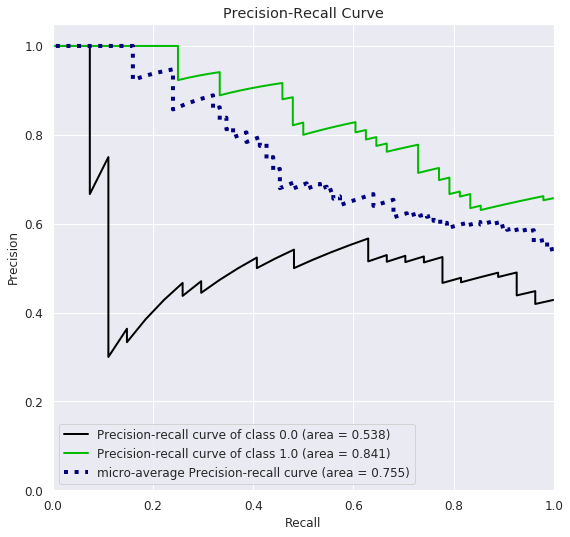

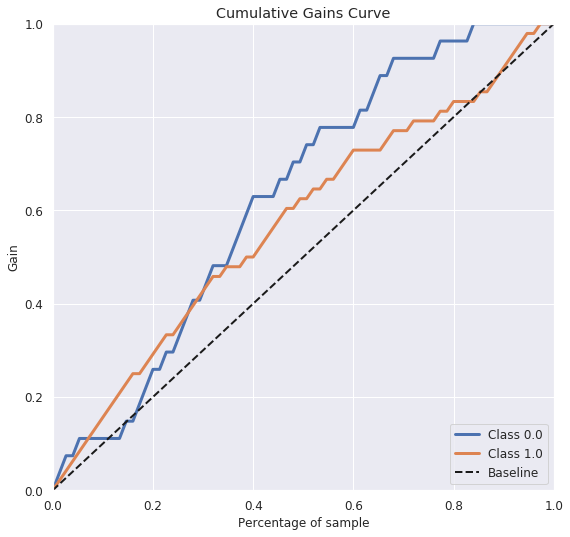

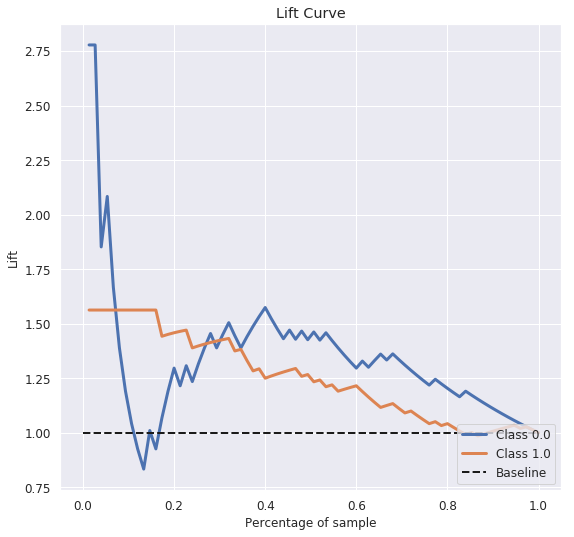

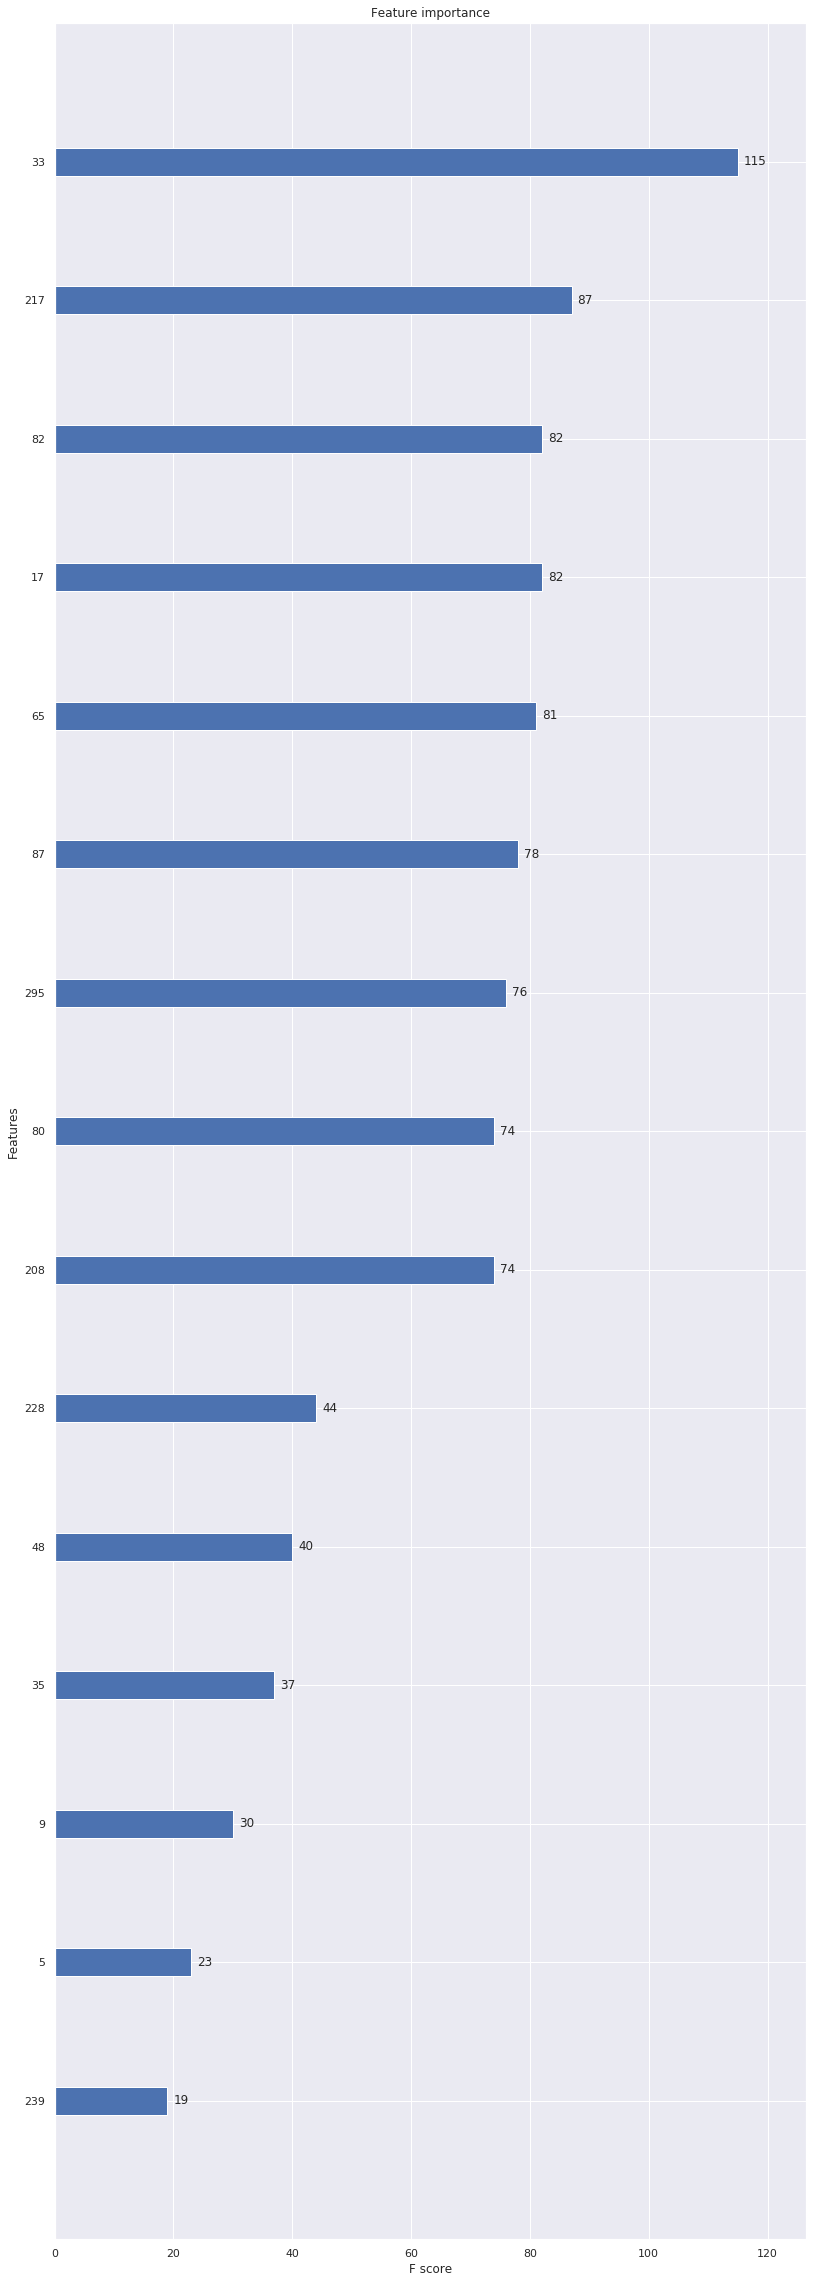

In [129]:
   fs_clf_xgb, predictions_test_fs_15_xgb = xgboost_all_purpose(X_fs_15,
                                                              y,
                                                              type_of_training =type_of_training, 
                                                              num_of_folds = num_of_folds, 
                                                              max_early_stopping= 100, 
                                                              name="fs_clf_15_xgb")

In [130]:
clf_stats_df

clf_name  F1-score  auc-score
0        clf_xgb  0.556818   0.689815
1  fs_clf_50_xgb  0.550713   0.721451
2  fs_clf_25_xgb  0.670000   0.756944
3  fs_clf_15_xgb  0.590826   0.775463

### ML Bayesian Tuning

In [131]:
def prepare_for_tuning(X, y, type_of_training):
    
    from sklearn.model_selection import train_test_split

    if type_of_training == "baseline":

        print("no resampling at all!")
        from sklearn.model_selection import train_test_split
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.3)

    elif type_of_training == "train_test_equal":

            print("train_test_equal")

            # create a 70/30 stratified split of the data 
            xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.3)

            print("resample xtrain set to be equal to the size of the test set")
            temp_df = pd.DataFrame(xtrain, columns=xtrain.columns)
            temp_df["target"] = ytrain
            temp_df = temp_df.sample(frac =  len(test) / len(xtrain), replace = True)
            ytrain = temp_df['target']
            xtrain = temp_df.drop(['target'], axis=1)
            del temp_df;
            print(xtrain.shape, test.shape)



    elif type_of_training == "oversampling":

        print("oversampling")

        from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

        # create a 70/30 split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.3)

        # RandomOverSampler
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)

        from collections import Counter
        print(sorted(Counter(y_resampled).items()))

        xtrain=pd.DataFrame(X_resampled, columns = X.columns)
        ytrain = y_resampled
        del X_resampled
        del y_resampled


    elif type_of_training == "augmentation_by_fraction":

        from sklearn.model_selection import train_test_split
        # the main idea here is to reducing the imbalance ratio from 9:1 to 3:1
        print("augmentation")

        from collections import Counter

        # create a 70/30 split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify = y, random_state=42, test_size=0.3)

        print("ytrain target values count before augmentation:\n", sorted(Counter(ytrain).items()))

        # Augmenting both minority and majority classes via RandomOverSampler by 3 times
        X_y = pd.DataFrame(xtrain, columns=X.columns)
        X_y["target"] = ytrain
        X_y = X_y.sample(frac=3, replace=True)
        X_y.target.value_counts()
        ytrain = X_y['target']
        print("ytrain target values count after oversampling:\n",sorted(Counter(ytrain).items()))
        xtrain = X_y.drop(['target'], axis=1)
        del X_y

        from imblearn.under_sampling import RandomUnderSampler

        # reducing the majority class almost back to its original form
        rus = RandomUnderSampler(sampling_strategy=0.33, random_state=42)
        X_resampled, y_resampled = rus.fit_resample(xtrain, ytrain)

        print("ytrain target values count after Augmentation:\n",sorted(Counter(y_resampled).items()))

        xtrain=pd.DataFrame(X_resampled, columns = X.columns)
        ytrain = y_resampled

        del X_resampled
        del y_resampled
        gc.collect();
        
    return xtrain, ytrain

In [132]:
def bayesian_tuning(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.model_selection import StratifiedKFold
    import xgboost as xgb

    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = xgb.XGBClassifier(
            nthread = -1,
            objective = 'binary:logistic',
            eval_metric = 'auc',
            silent=1,
            tree_method='auto'
        ),
        search_spaces = {
            'learning_rate': (0.01, 1.0, 'log-uniform'),
            'min_child_weight': (0, 10),
            'n_estimators': (50, 100),
            'max_depth': (0, 12),
            'gamma': (1e-2, 20, 'log-uniform'),
            'subsample': (0.01, 1.0, 'uniform'),
            'colsample_bytree': (0.01, 1.0, 'uniform'),
            'colsample_bylevel': (0.01, 1.0, 'uniform'),
            'colsample_bynode': (0.01, 1.0, 'uniform'),
            'scale_pos_weight': (0.01, 1.0, 'uniform'),
            'reg_lambda': (1e-2, 10, 'log-uniform'),
            'reg_alpha': (1e-4, 1.0, 'log-uniform'),
            'max_delta_step': (0, 10, 'uniform'),
            'scale_pos_weight': (1e-2, 1, 'uniform')
        },    
        scoring = 'roc_auc',
        cv = StratifiedKFold(
            n_splits=3,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 1,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))

        ### Save all model results
        #clf_name = bayes_cv_tuner.estimator.__class__.__name__
        #all_models.to_csv(clf_name+"_cv_results.csv")
        ###
        
    result = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result
    
# Fit the model
xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

no resampling at all!
Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bynode': 0.7304484857455519, 'colsample_bytree': 0.9335393188593556, 'gamma': 0.11027166465747819, 'learning_rate': 0.21892527128216444, 'max_delta_step': 4.141186324855385, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 65, 'reg_alpha': 0.03900913797689036, 'reg_lambda': 0.44657234554173236, 'scale_pos_weight': 0.13556548021189216, 'subsample': 0.18630307921210337}

Model #2
Best ROC-AUC: 0.5409
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bynode': 0.8844821246070537, 'colsample_bytree': 0.3103760087853332, 'gamma': 13.804435384703206, 'learning_rate': 0.5348793493196706, 'max_delta_step': 0.6231294084407147, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 82, 'reg_alpha': 0.651509271961212, 'reg_lambda': 0.7757168039532444, 'scale_pos_weight': 0.9923710598637134, 'subsample': 0.7691228483798597}

Model #3
Best ROC-AUC: 0.5409
Best para

### Tuned XGBoost training

params {'colsample_bylevel': 0.5479690370134094, 'colsample_bynode': 0.9208091341729433, 'colsample_bytree': 0.5015020365607495, 'gamma': 5.822761808427536, 'learning_rate': 0.04447541043186938, 'max_delta_step': 0.5113455367705179, 'max_depth': 7, 'min_child_weight': 0, 'n_estimators': 3000, 'reg_alpha': 0.2012722148890726, 'reg_lambda': 0.12657322243188532, 'scale_pos_weight': 0.577028860872224, 'subsample': 0.6934306204140721}
max_early_stopping: 200
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.692123	validation_1-auc:0.59375
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.95542	validation_1-auc:0.648438
[200]	validation_0-auc:0.958967	validation_1-auc:0.597098
Stopping. Best iteration:
[76]	validation_0-auc:0.95732	validation_1-auc:0.666295


Stratified Fold: 1

[0]	validation_0-auc:0.684017	validation_1-auc:0.642857
Multiple eval metrics ha

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


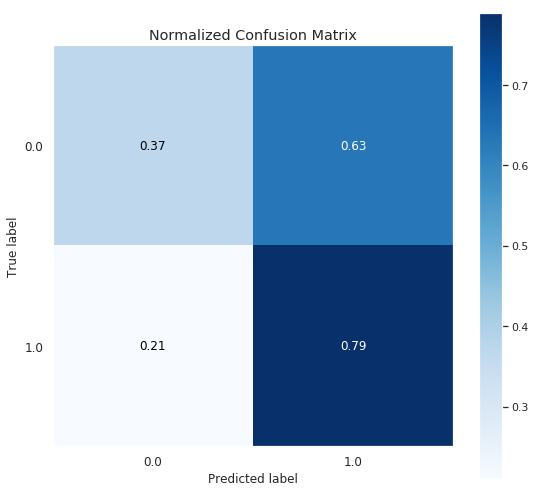

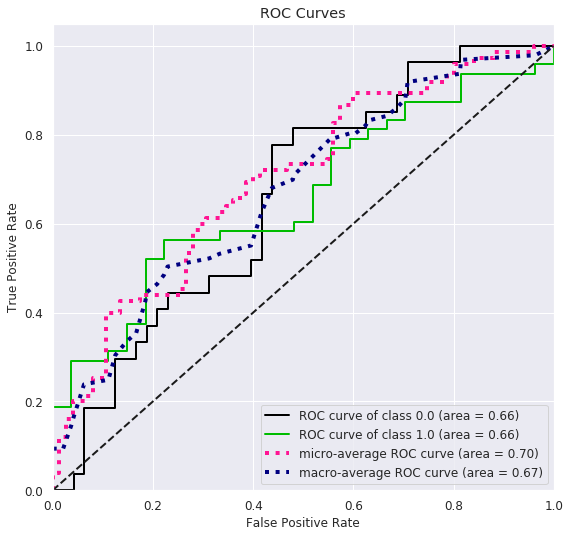

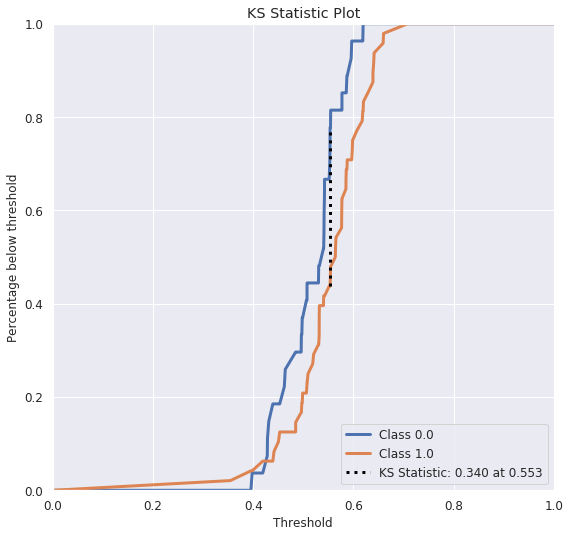

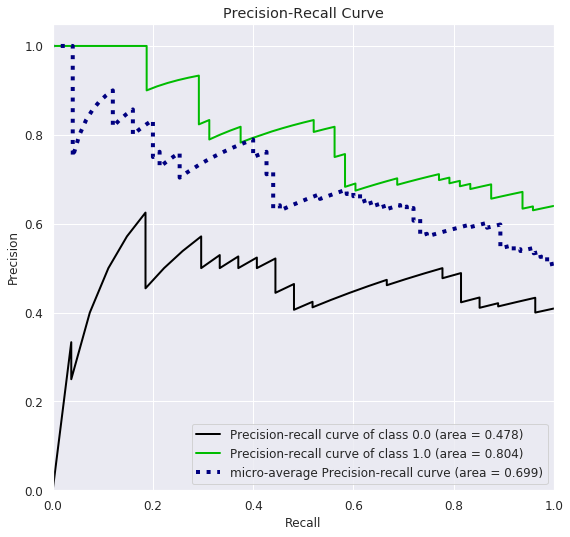

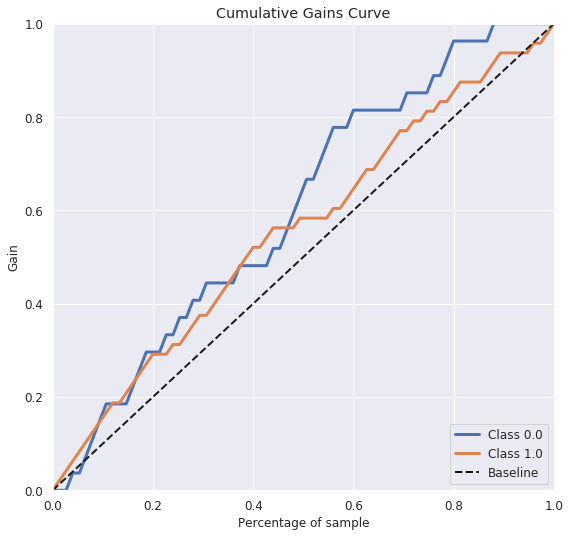

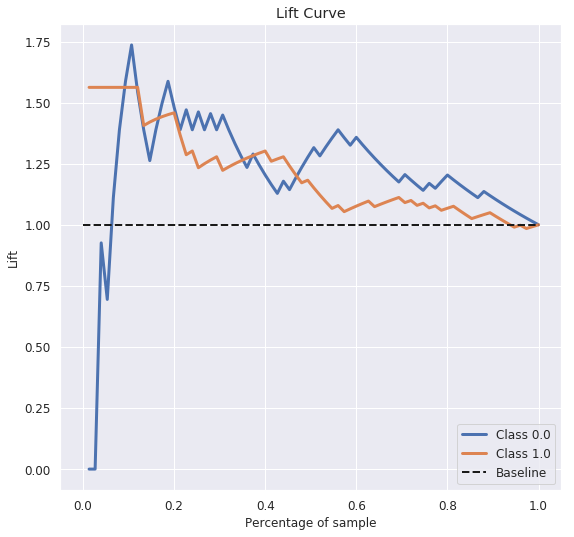

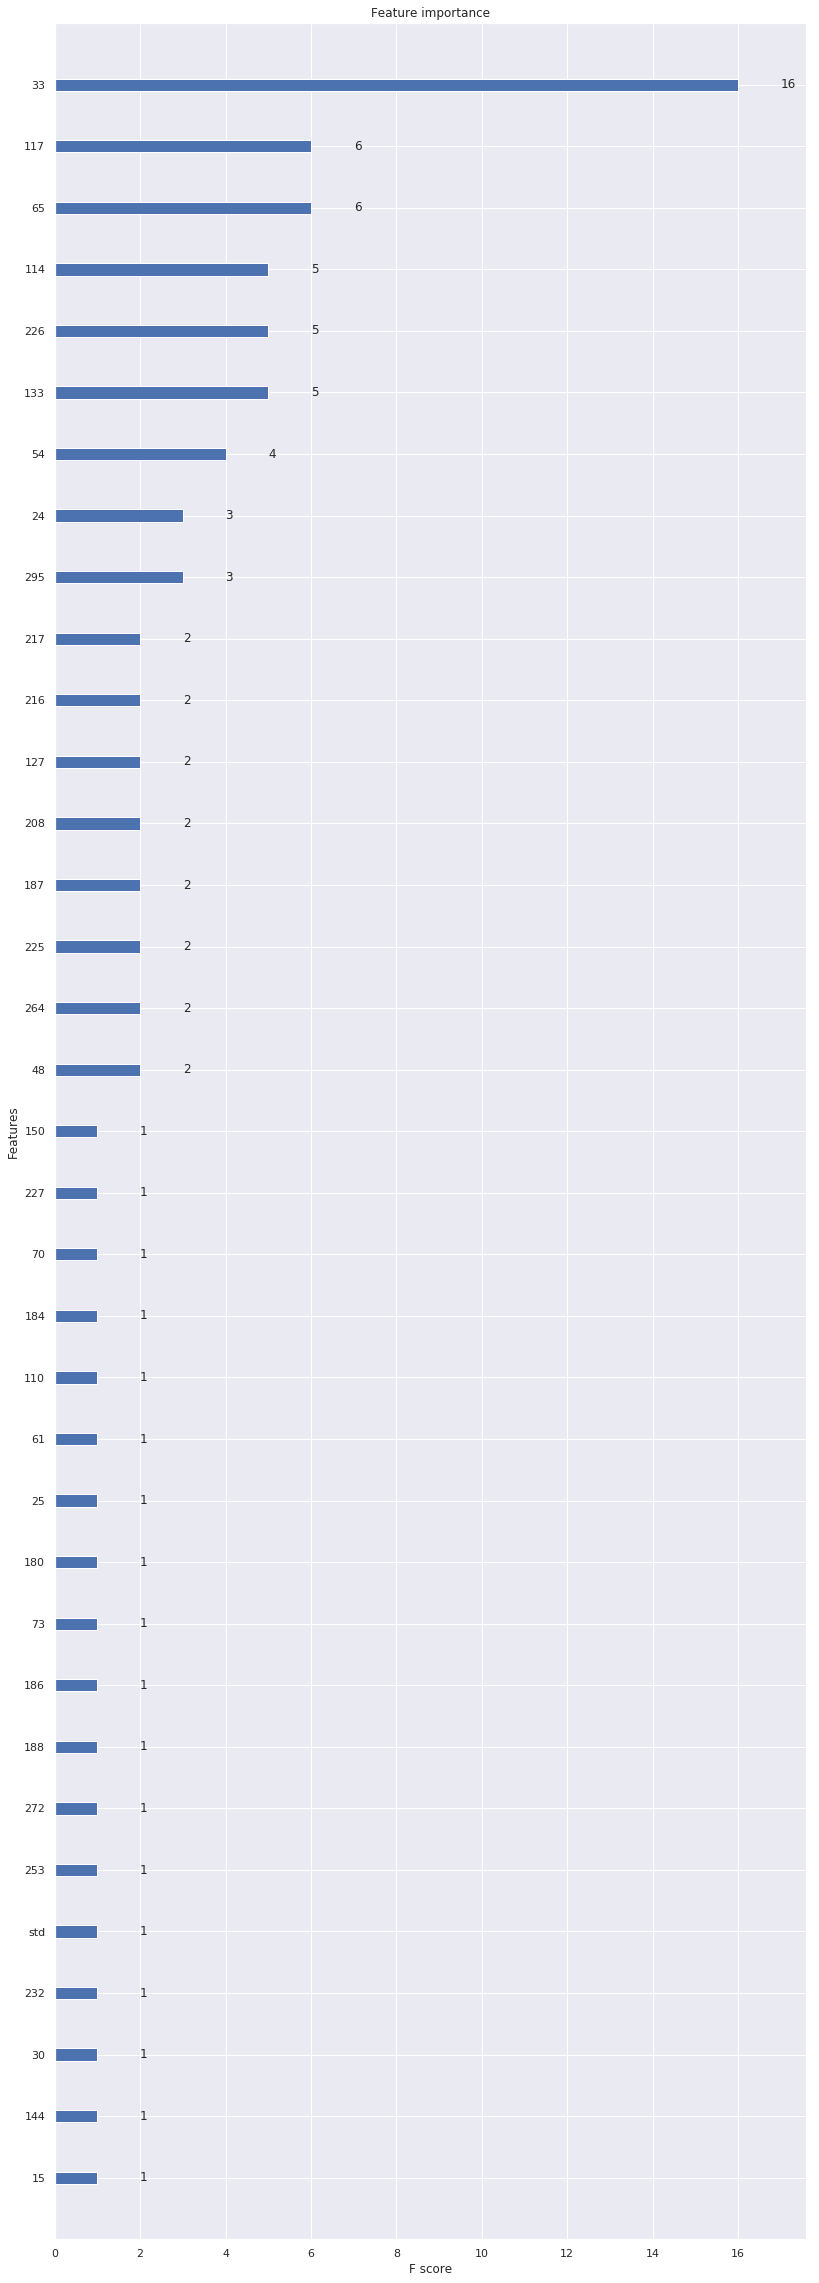

In [133]:
gc.collect()

result.best_params_['n_estimators'] = 3000

num_of_folds = 4 ### must be more than 2

tuned_clf_xgb, predictions_test_tuned_xgb = xgboost_all_purpose(X,
                                                                y,
                                                                type_of_training = type_of_training, 
                                                                num_of_folds=num_of_folds, 
                                                                params = result.best_params_, 
                                                                max_early_stopping = 200, 
                                                                in_folds_sampling = False,
                                                                name="tuned_clf_xgb")

In [134]:
clf_stats_df

clf_name  F1-score  auc-score
0        clf_xgb  0.556818   0.689815
1  fs_clf_50_xgb  0.550713   0.721451
2  fs_clf_25_xgb  0.670000   0.756944
3  fs_clf_15_xgb  0.590826   0.775463
4  tuned_clf_xgb  0.581698   0.773148

In [135]:
xtrain, ytrain = prepare_for_tuning(X_fs_50, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

no resampling at all!
Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bynode': 0.7304484857455519, 'colsample_bytree': 0.9335393188593556, 'gamma': 0.11027166465747819, 'learning_rate': 0.21892527128216444, 'max_delta_step': 4.141186324855385, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 65, 'reg_alpha': 0.03900913797689036, 'reg_lambda': 0.44657234554173236, 'scale_pos_weight': 0.13556548021189216, 'subsample': 0.18630307921210337}

Model #2
Best ROC-AUC: 0.5735
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bynode': 0.8844821246070537, 'colsample_bytree': 0.3103760087853332, 'gamma': 13.804435384703206, 'learning_rate': 0.5348793493196706, 'max_delta_step': 0.6231294084407147, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 82, 'reg_alpha': 0.651509271961212, 'reg_lambda': 0.7757168039532444, 'scale_pos_weight': 0.9923710598637134, 'subsample': 0.7691228483798597}

Model #3
Best ROC-AUC: 0.5735
Best para

### Tuned XGBoost training with top 50 features

params {'colsample_bylevel': 0.5479690370134094, 'colsample_bynode': 0.9208091341729433, 'colsample_bytree': 0.5015020365607495, 'gamma': 5.822761808427536, 'learning_rate': 0.04447541043186938, 'max_delta_step': 0.5113455367705179, 'max_depth': 7, 'min_child_weight': 0, 'n_estimators': 3000, 'reg_alpha': 0.2012722148890726, 'reg_lambda': 0.12657322243188532, 'scale_pos_weight': 0.577028860872224, 'subsample': 0.6934306204140721}
max_early_stopping: 200
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.5	validation_1-auc:0.5
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.874747	validation_1-auc:0.683036
[200]	validation_0-auc:0.884625	validation_1-auc:0.705357
[300]	validation_0-auc:0.886525	validation_1-auc:0.727679
[400]	validation_0-auc:0.89653	validation_1-auc:0.738839
[500]	validation_0-auc:0.898683	validation_1-auc:0.723214
Stopping. Best iter

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


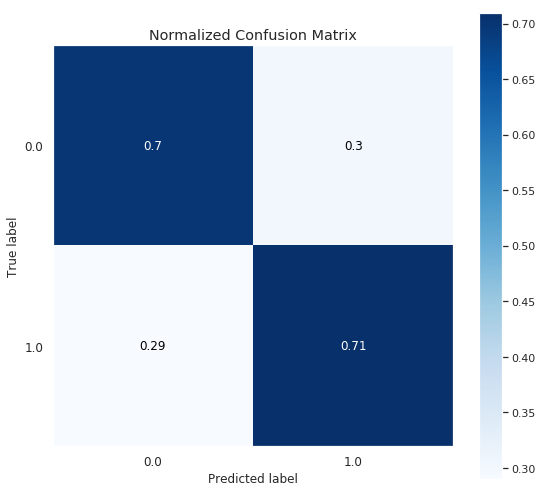

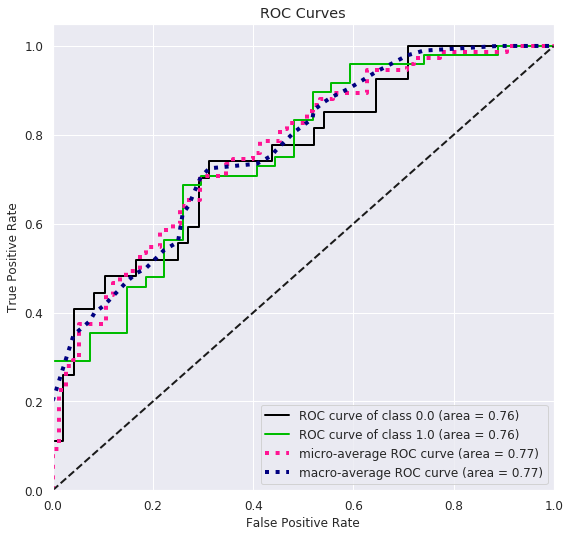

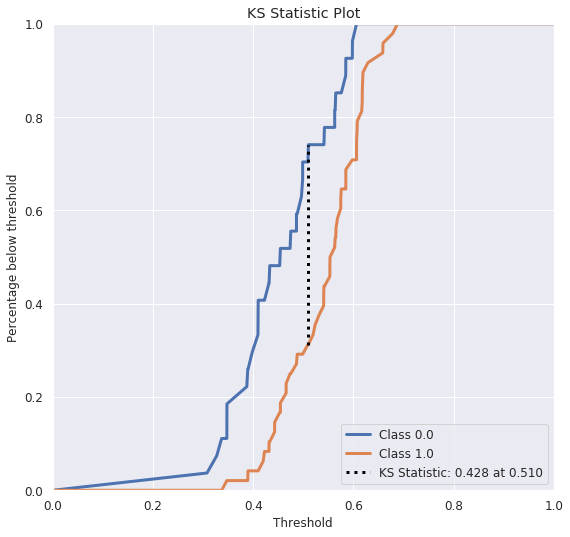

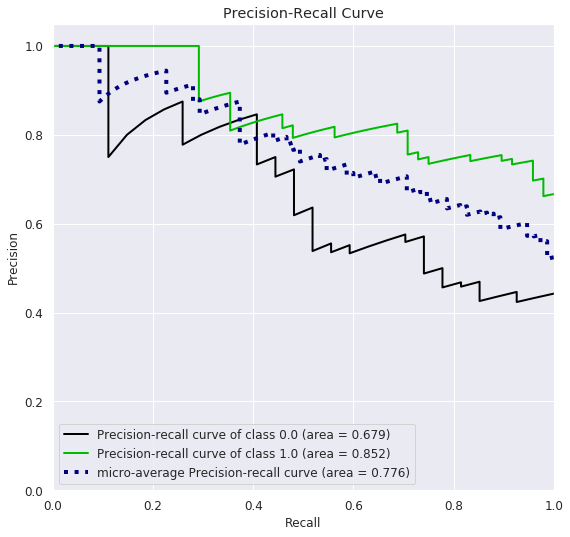

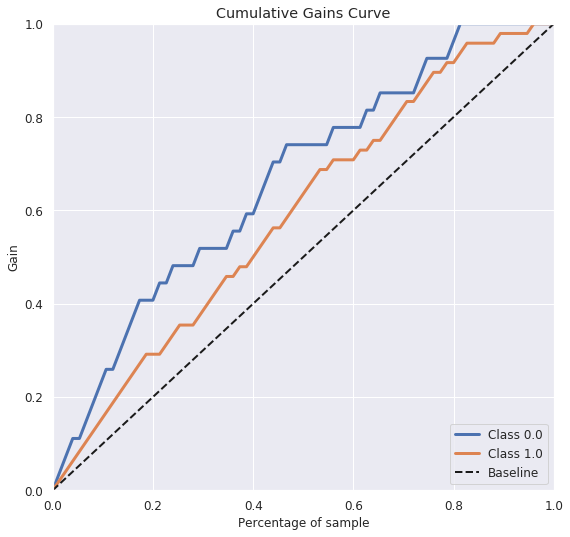

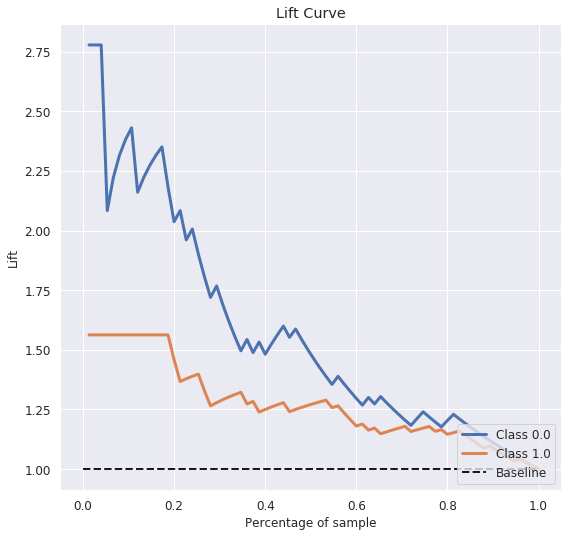

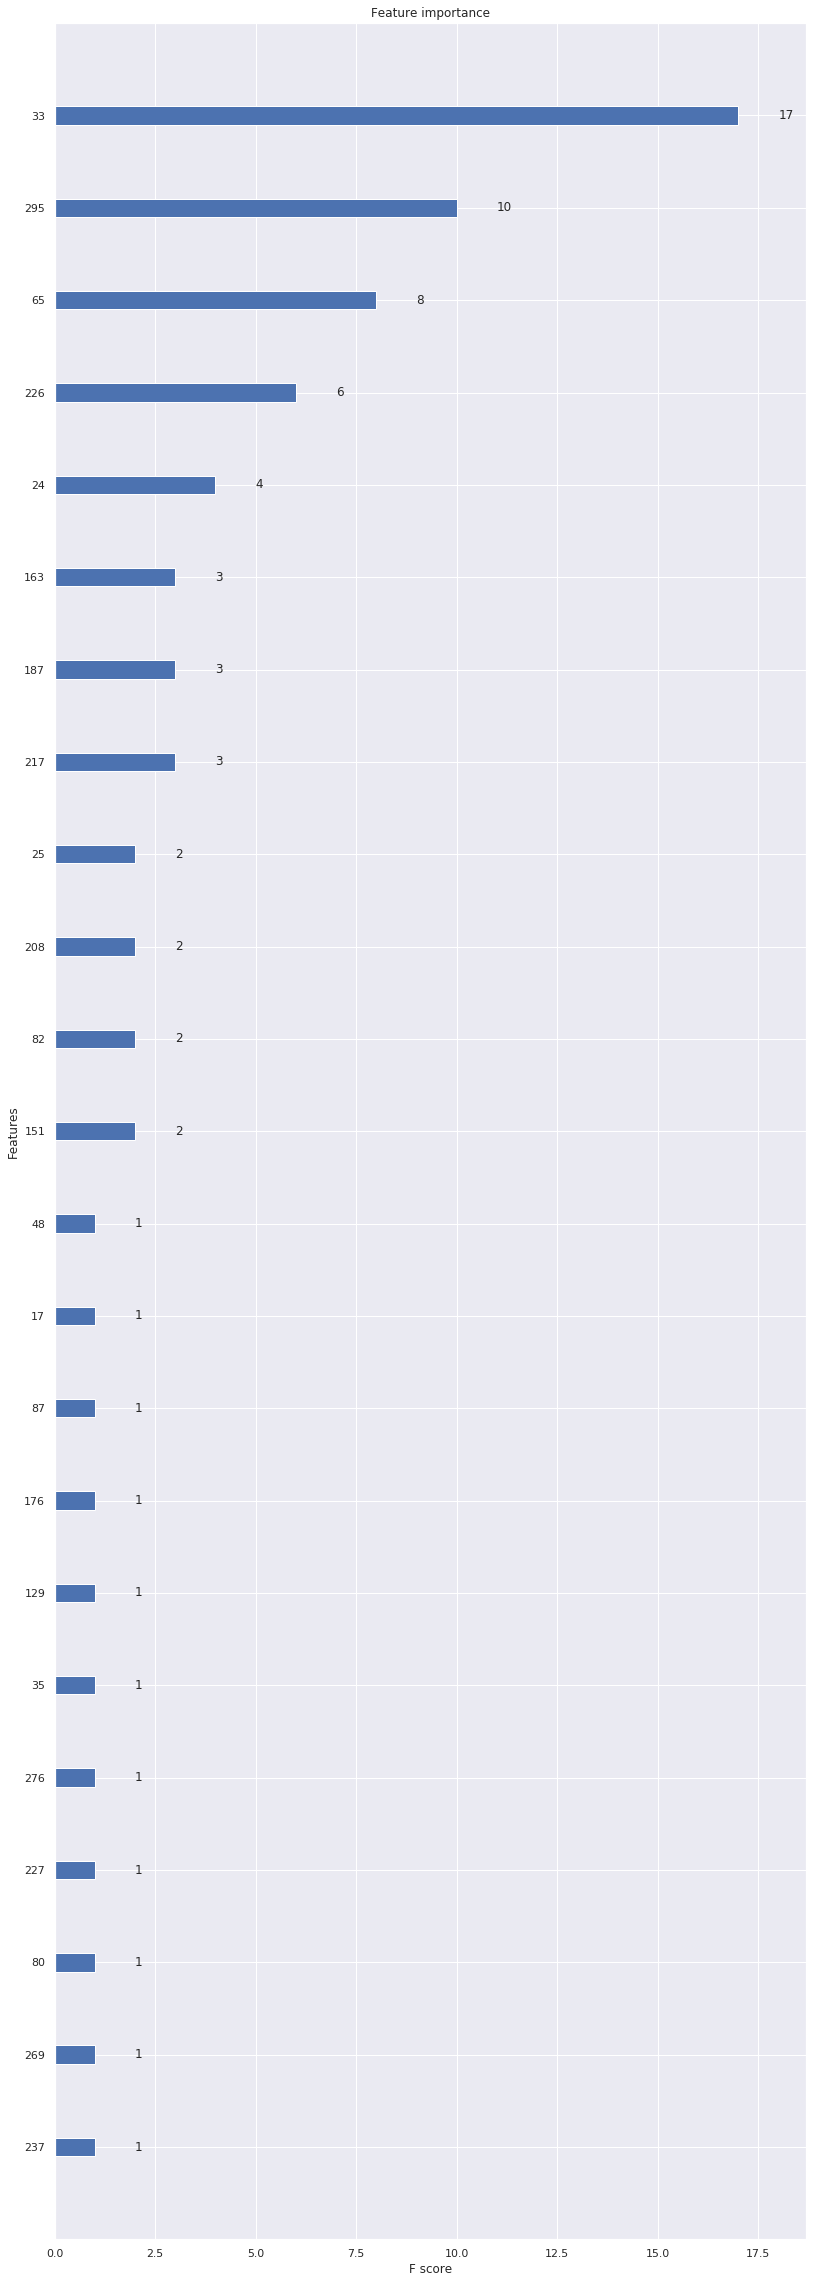

In [136]:
gc.collect()

result.best_params_['n_estimators'] = 3000

num_of_folds = 4 ### must be more than 2

tuned_clf_fs_50_xgb, predictions_test_tuned_fs_50_xgb = xgboost_all_purpose(X_fs_50,
                                                                y,
                                                                type_of_training = type_of_training, 
                                                                num_of_folds=num_of_folds, 
                                                                params = result.best_params_, 
                                                                max_early_stopping = 200, 
                                                                in_folds_sampling = False,
                                                                name="tuned_clf_fs_50_xgb")

In [137]:
clf_stats_df

clf_name  F1-score  auc-score
0              clf_xgb  0.556818   0.689815
1        fs_clf_50_xgb  0.550713   0.721451
2        fs_clf_25_xgb  0.670000   0.756944
3        fs_clf_15_xgb  0.590826   0.775463
4        tuned_clf_xgb  0.581698   0.773148
5  tuned_clf_fs_50_xgb  0.694444   0.765432

In [138]:
xtrain, ytrain = prepare_for_tuning(X_fs_25, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

no resampling at all!
Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bynode': 0.7304484857455519, 'colsample_bytree': 0.9335393188593556, 'gamma': 0.11027166465747819, 'learning_rate': 0.21892527128216444, 'max_delta_step': 4.141186324855385, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 65, 'reg_alpha': 0.03900913797689036, 'reg_lambda': 0.44657234554173236, 'scale_pos_weight': 0.13556548021189216, 'subsample': 0.18630307921210337}

Model #2
Best ROC-AUC: 0.5119
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bynode': 0.8844821246070537, 'colsample_bytree': 0.3103760087853332, 'gamma': 13.804435384703206, 'learning_rate': 0.5348793493196706, 'max_delta_step': 0.6231294084407147, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 82, 'reg_alpha': 0.651509271961212, 'reg_lambda': 0.7757168039532444, 'scale_pos_weight': 0.9923710598637134, 'subsample': 0.7691228483798597}

Model #3
Best ROC-AUC: 0.5119
Best para

### Tuned XGBoost training with top 25 features

params {'colsample_bylevel': 0.5479690370134094, 'colsample_bynode': 0.9208091341729433, 'colsample_bytree': 0.5015020365607495, 'gamma': 5.822761808427536, 'learning_rate': 0.04447541043186938, 'max_delta_step': 0.5113455367705179, 'max_depth': 7, 'min_child_weight': 0, 'n_estimators': 3000, 'reg_alpha': 0.2012722148890726, 'reg_lambda': 0.12657322243188532, 'scale_pos_weight': 0.577028860872224, 'subsample': 0.6934306204140721}
max_early_stopping: 200
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.5	validation_1-auc:0.5
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.821555	validation_1-auc:0.675223
[200]	validation_0-auc:0.853343	validation_1-auc:0.698661
[300]	validation_0-auc:0.85271	validation_1-auc:0.691964
[400]	validation_0-auc:0.863349	validation_1-auc:0.728795
[500]	validation_0-auc:0.867528	validation_1-auc:0.745536
[600]	validation_0-

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


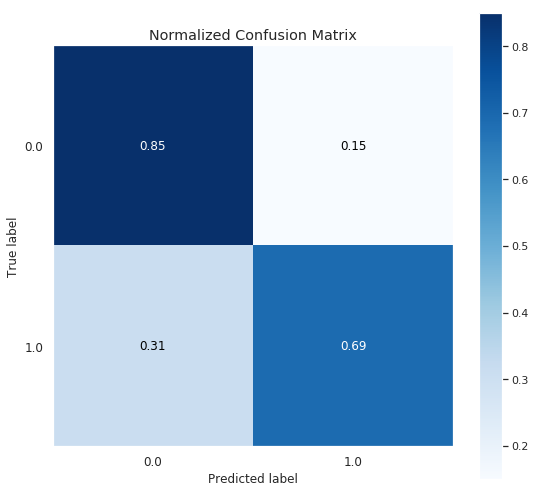

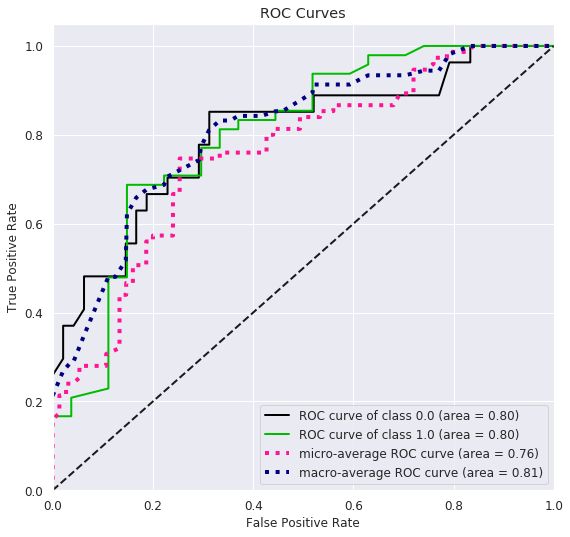

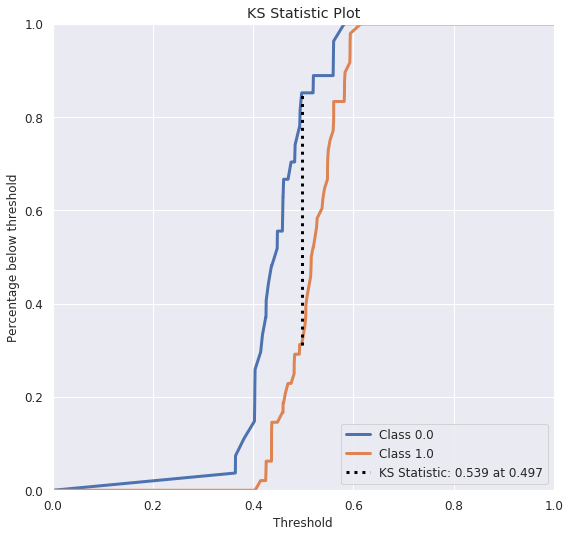

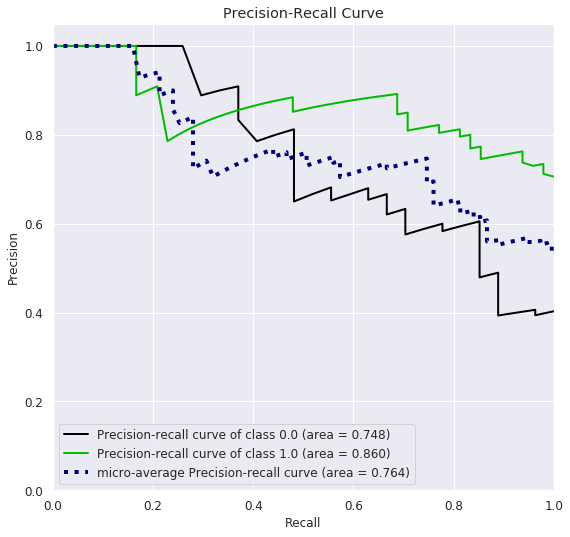

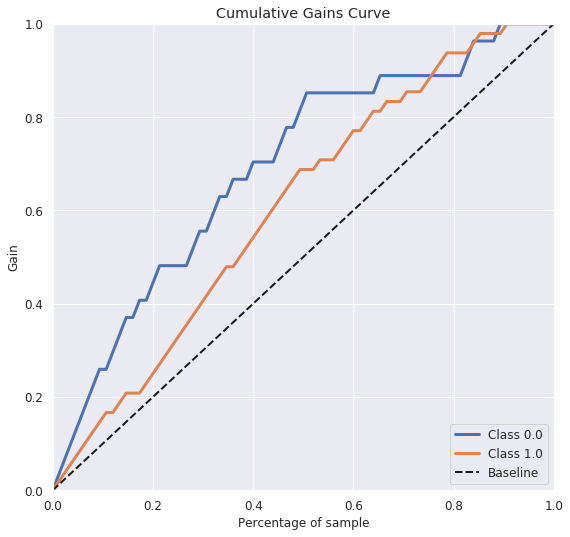

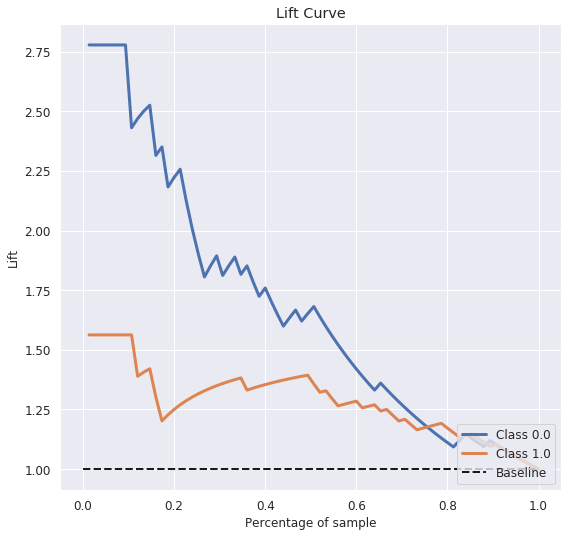

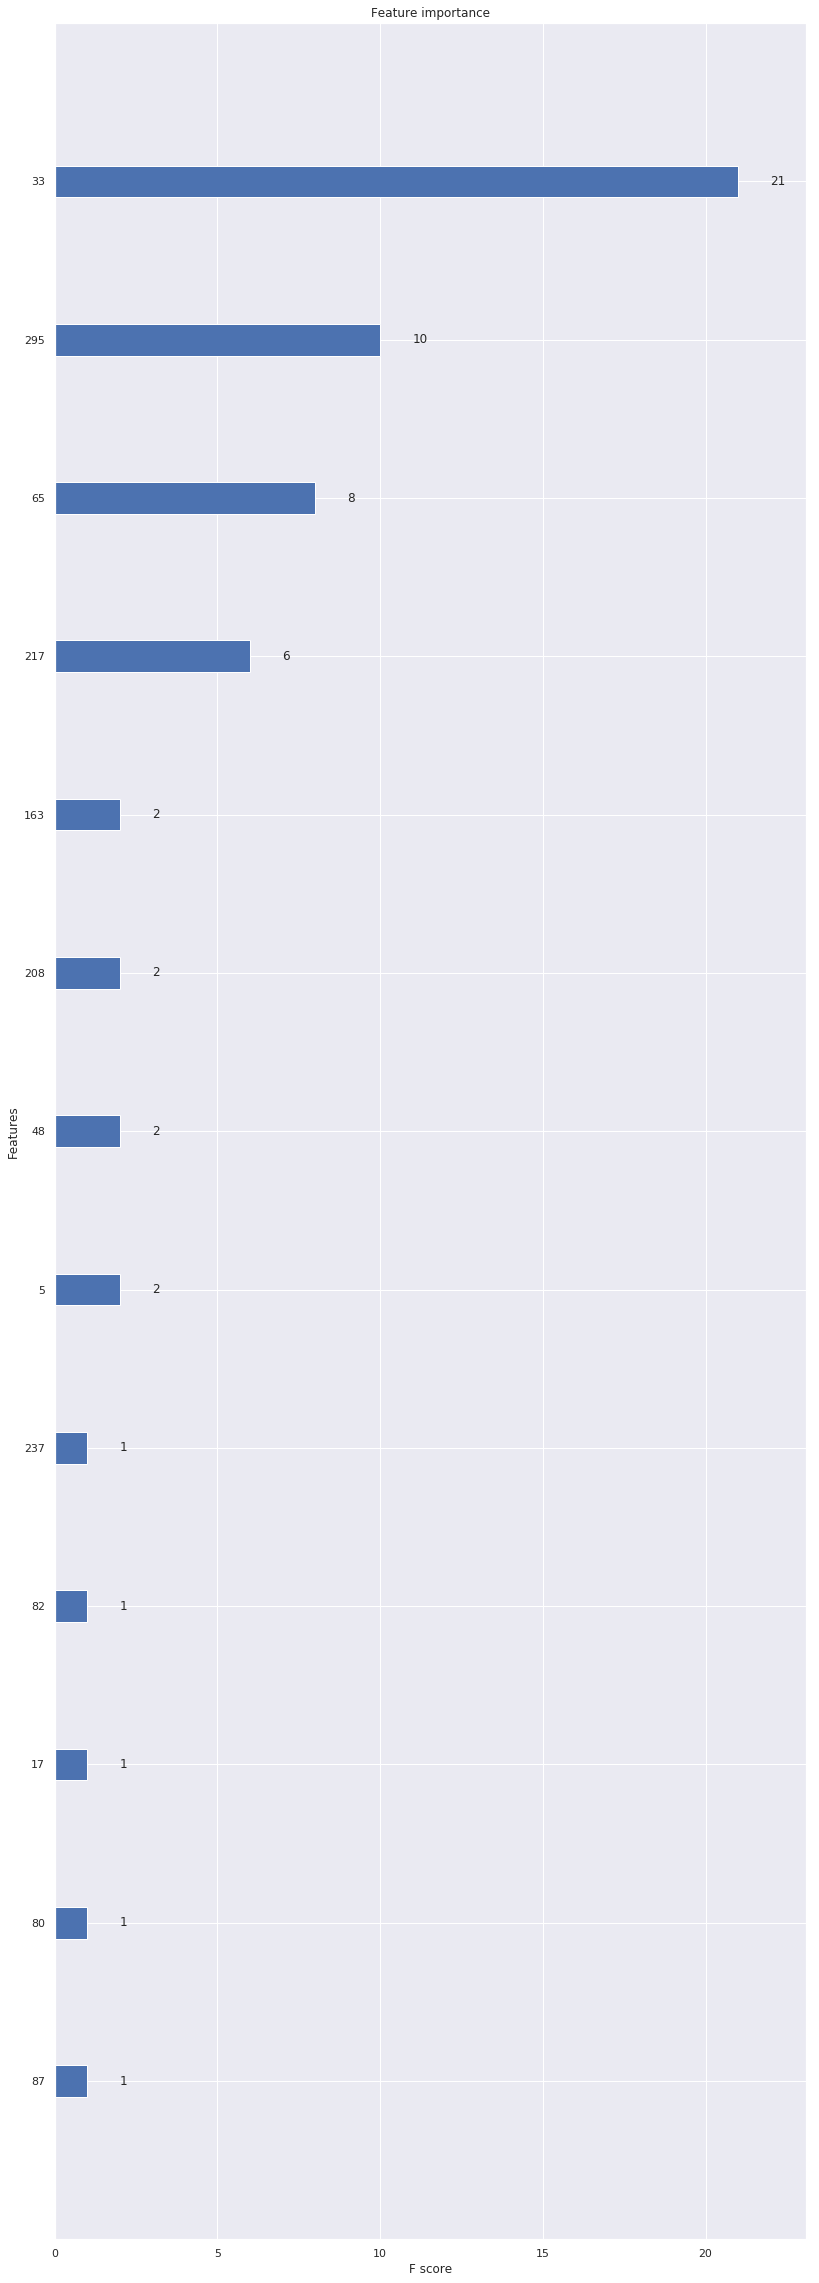

In [139]:
gc.collect()

result.best_params_['n_estimators'] = 3000

num_of_folds = 4 ### must be more than 2

tuned_clf_fs_25_xgb, predictions_test_tuned_fs_25_xgb = xgboost_all_purpose(X_fs_25,
                                                                y,
                                                                type_of_training = type_of_training, 
                                                                num_of_folds=num_of_folds, 
                                                                params = result.best_params_, 
                                                                max_early_stopping = 200, 
                                                                in_folds_sampling = False,
                                                                name="tuned_clf_fs_25_xgb")

In [140]:
clf_stats_df

clf_name  F1-score  auc-score
0              clf_xgb  0.556818   0.689815
1        fs_clf_50_xgb  0.550713   0.721451
2        fs_clf_25_xgb  0.670000   0.756944
3        fs_clf_15_xgb  0.590826   0.775463
4        tuned_clf_xgb  0.581698   0.773148
5  tuned_clf_fs_50_xgb  0.694444   0.765432
6  tuned_clf_fs_25_xgb  0.742081   0.801698

In [141]:
xtrain, ytrain = prepare_for_tuning(X_fs_15, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

no resampling at all!
Model #1
Best ROC-AUC: 0.5
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bynode': 0.7304484857455519, 'colsample_bytree': 0.9335393188593556, 'gamma': 0.11027166465747819, 'learning_rate': 0.21892527128216444, 'max_delta_step': 4.141186324855385, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 65, 'reg_alpha': 0.03900913797689036, 'reg_lambda': 0.44657234554173236, 'scale_pos_weight': 0.13556548021189216, 'subsample': 0.18630307921210337}

Model #2
Best ROC-AUC: 0.562
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bynode': 0.8844821246070537, 'colsample_bytree': 0.3103760087853332, 'gamma': 13.804435384703206, 'learning_rate': 0.5348793493196706, 'max_delta_step': 0.6231294084407147, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 82, 'reg_alpha': 0.651509271961212, 'reg_lambda': 0.7757168039532444, 'scale_pos_weight': 0.9923710598637134, 'subsample': 0.7691228483798597}

Model #3
Best ROC-AUC: 0.562
Best params

### Tuned XGBoost training with top 15 features

params {'colsample_bylevel': 0.5479690370134094, 'colsample_bynode': 0.9208091341729433, 'colsample_bytree': 0.5015020365607495, 'gamma': 5.822761808427536, 'learning_rate': 0.04447541043186938, 'max_delta_step': 0.5113455367705179, 'max_depth': 7, 'min_child_weight': 0, 'n_estimators': 3000, 'reg_alpha': 0.2012722148890726, 'reg_lambda': 0.12657322243188532, 'scale_pos_weight': 0.577028860872224, 'subsample': 0.6934306204140721}
max_early_stopping: 200
baseline

Stratified Fold: 0

[0]	validation_0-auc:0.692123	validation_1-auc:0.59375
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.823582	validation_1-auc:0.729911
[200]	validation_0-auc:0.849291	validation_1-auc:0.743304
[300]	validation_0-auc:0.849164	validation_1-auc:0.737723
Stopping. Best iteration:
[150]	validation_0-auc:0.847011	validation_1-auc:0.757812


Stratified Fold: 1

[0]	validation_0-au

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


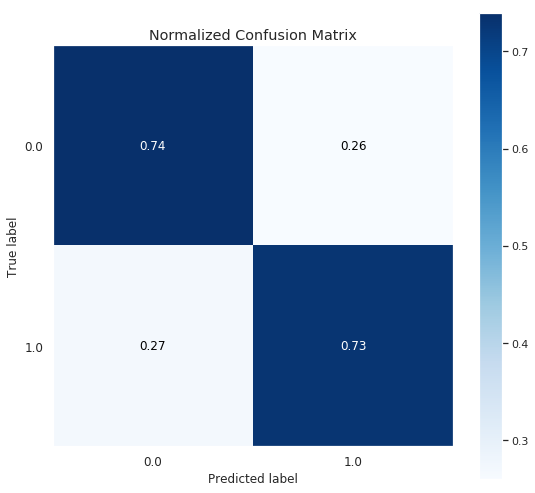

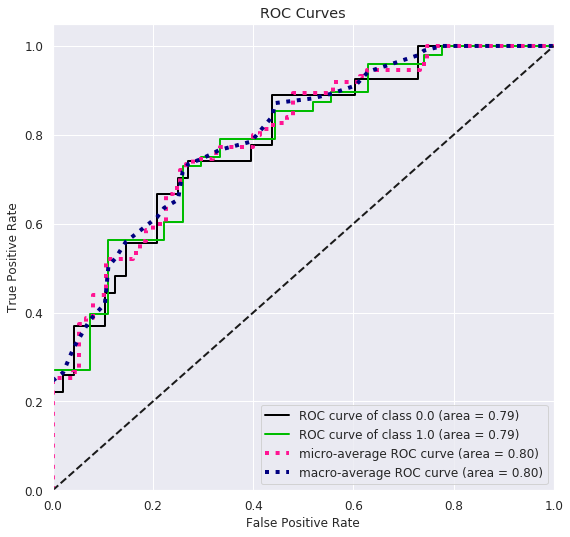

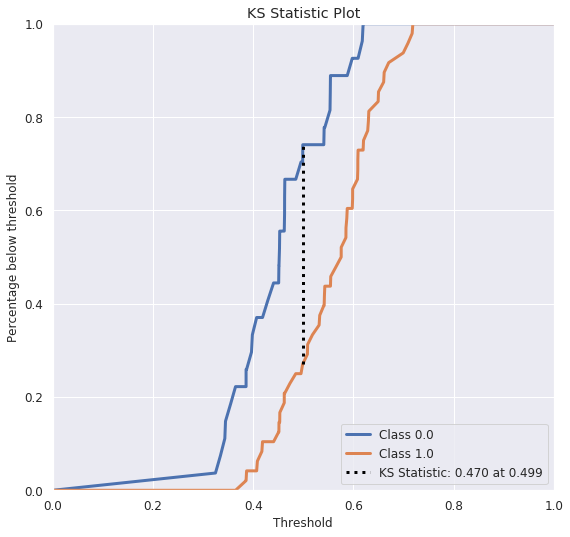

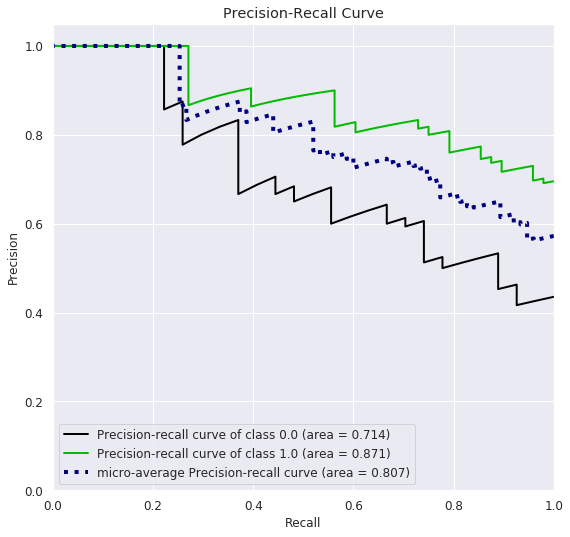

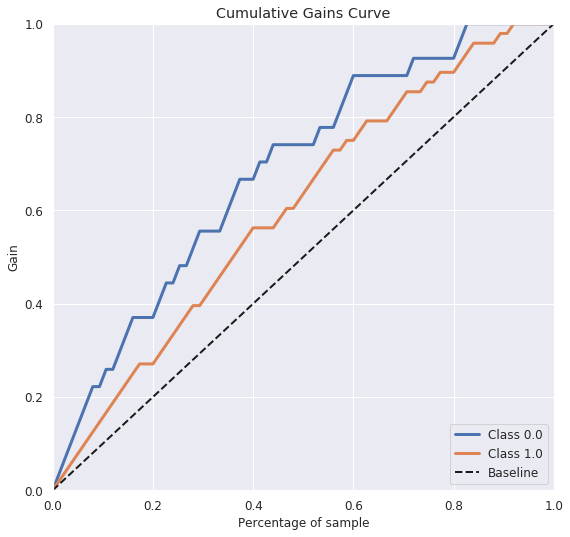

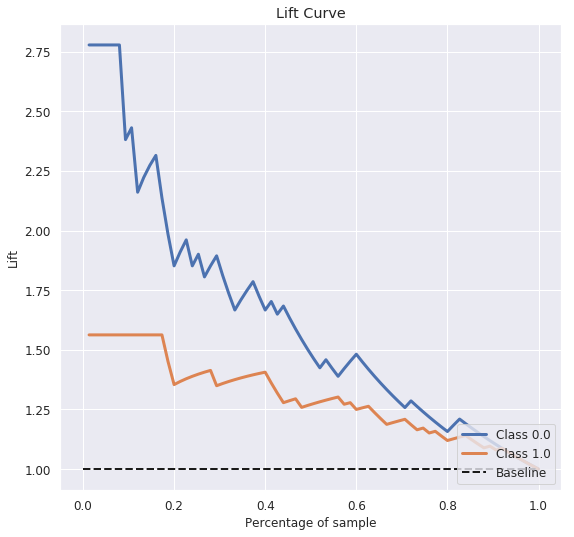

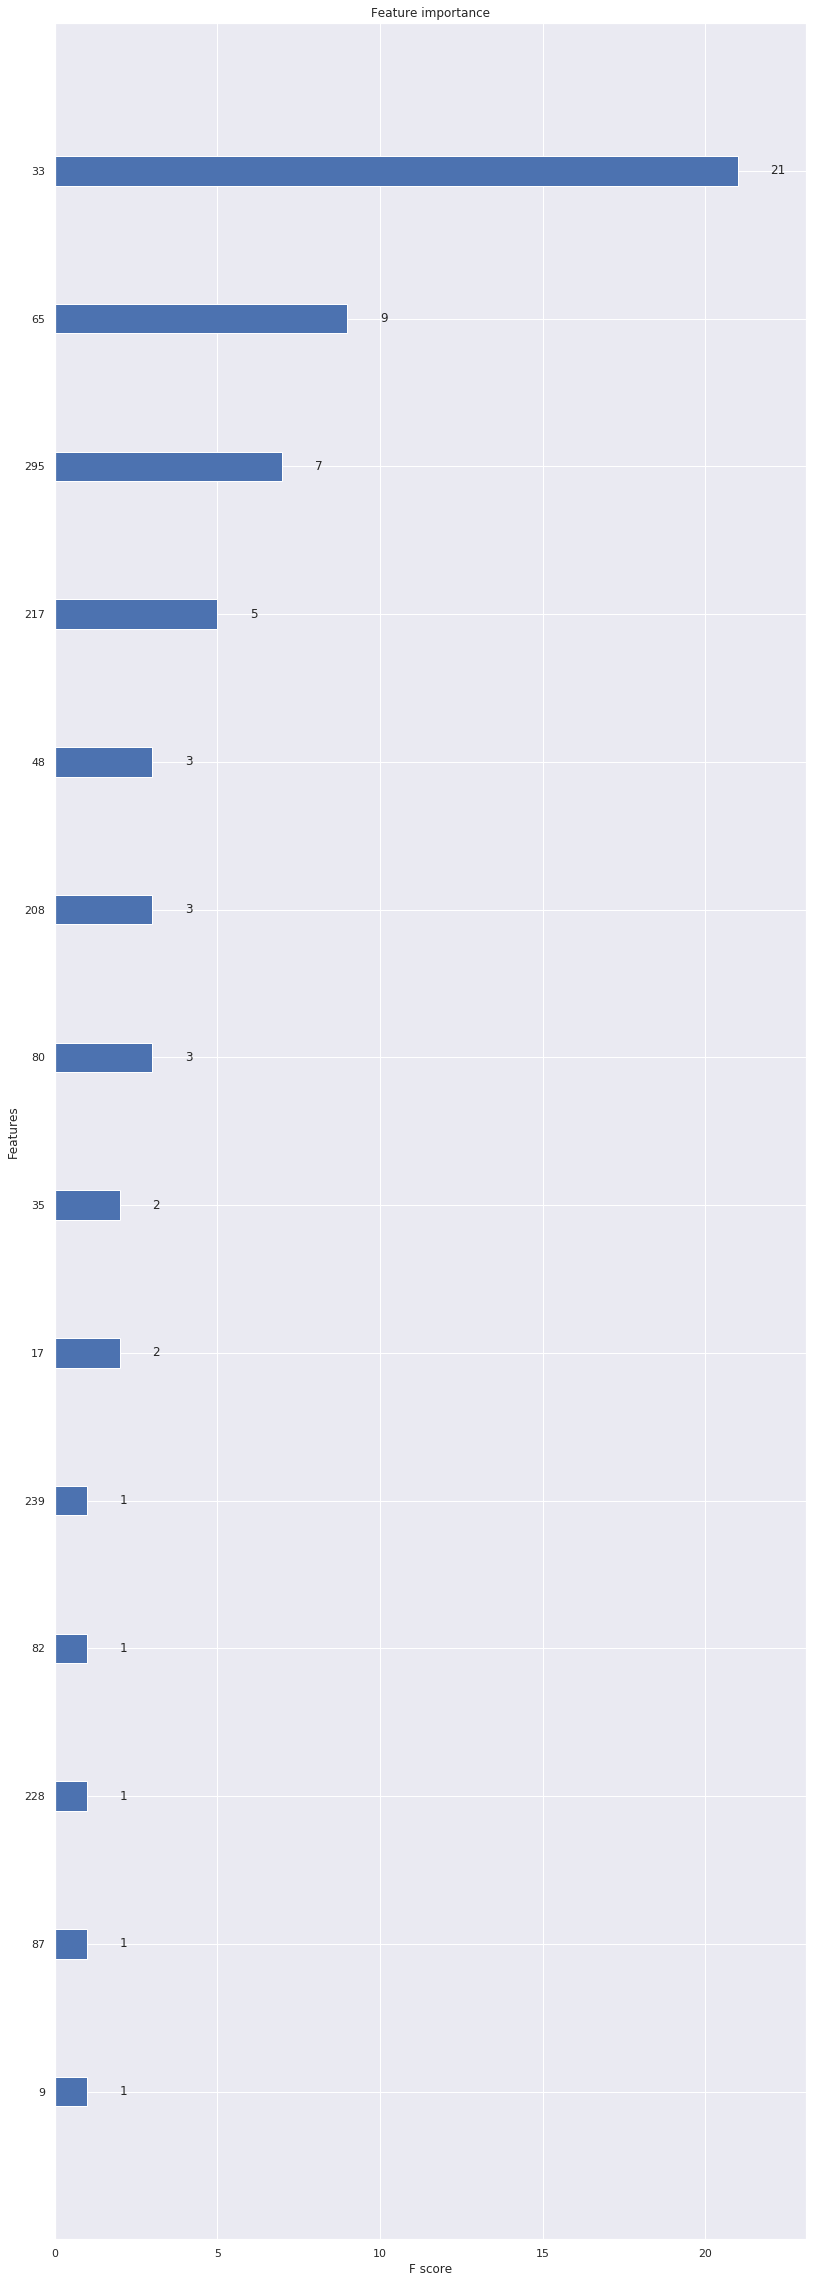

In [142]:
gc.collect()

result.best_params_['n_estimators'] = 3000

num_of_folds = 4 ### must be more than 2

tuned_clf_fs_15_xgb, predictions_test_tuned_fs_15_xgb = xgboost_all_purpose(X_fs_15,
                                                                y,
                                                                type_of_training = type_of_training, 
                                                                num_of_folds=num_of_folds, 
                                                                params = result.best_params_, 
                                                                max_early_stopping = 200, 
                                                                in_folds_sampling = False,
                                                                name="tuned_clf_fs_15_xgb")

In [143]:
clf_stats_df

clf_name  F1-score  auc-score
0              clf_xgb  0.556818   0.689815
1        fs_clf_50_xgb  0.550713   0.721451
2        fs_clf_25_xgb  0.670000   0.756944
3        fs_clf_15_xgb  0.590826   0.775463
4        tuned_clf_xgb  0.581698   0.773148
5  tuned_clf_fs_50_xgb  0.694444   0.765432
6  tuned_clf_fs_25_xgb  0.742081   0.801698
7  tuned_clf_fs_15_xgb  0.722222   0.790123

## Preparing Submissions

In [144]:
gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = predictions_test_xgb
submission.to_csv('clf_xgb.csv', index=False)


if feature_selection_flag == True:
    
    gc.collect();
    submission = pd.read_csv('../input/sample_submission.csv')
    submission['target'] = predictions_test_fs_50_xgb
    submission.to_csv('fs_50_clf_xgb.csv', index=False)
    
    gc.collect();
    submission = pd.read_csv('../input/sample_submission.csv')
    submission['target'] = predictions_test_fs_25_xgb
    submission.to_csv('fs_25_clf_xgb.csv', index=False)
    
    gc.collect();
    submission = pd.read_csv('../input/sample_submission.csv')
    submission['target'] = predictions_test_fs_15_xgb
    submission.to_csv('fs_15_clf_xgb.csv', index=False)


gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = predictions_test_tuned_xgb
submission.to_csv('tuned_clf_xgb.csv', index=False)

gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = predictions_test_tuned_fs_50_xgb
submission.to_csv('tuned_clf_fs_50_xgb.csv', index=False)

gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = predictions_test_tuned_fs_25_xgb
submission.to_csv('tuned_clf_fs_25_xgb.csv', index=False)

gc.collect();
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = predictions_test_tuned_fs_15_xgb
submission.to_csv('tuned_clf_fs_15_xgb.csv', index=False)

## Conclusion
<a id="conclusion"></a>
We can see from EDA and ML Modeling that class #1 is very unbalanced and difficult to identified and classified.

_________________________________________
*I would be happy if my kernel helped you understand this problem and the data better.
if this kernel is helpful to you a thumb up or follow would be much appreciated!*